In [1]:
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
import pymc3 as pm

In [2]:
from matplotlib import figure

In [3]:
# import scipy.io

In [4]:
path = 'datos/'
fileName = 'SAOCOM_Chubut_TesisNatyAreasRojas_DatosFiltradosParaRegresion_11x11.csv'

In [5]:
rho_lenga = 930 # [kg/m3] Nothofagus pumilio
rho_nire = 1035 # [kg/m3] Nothofagus antarctica

In [128]:

# C11 = mat['C11mn']#, 'C11std', 
# C12 = 1j*mat['C12imn'] + mat['C12rmn'], #'C12istd','C12rstd', 
# C13 = 1j*mat['C13imn'] + mat['C13rmn'], #'C13istd', 'C13rstd', 
# C22 = mat['C22mn'] #'C22std', 
# C23 = 1j*mat['C23imn'] + mat['C23rmn'], # 'C23istd',  'C23rstd', 
# C33 = mat['C33mn'] #, 'C33std'
# C21 = np.conjugate(C12)
# C31 = np.conjugate(C13)
# C32 = np.conjugate(C23)
# C = np.asarray([[C11, C12, C12], [C21, C22, C23], [C31, C32, C33]])

def dB(x):
    return 10*np.log10(x)

def toPower(x):
    return 10**(x/10)

def anotattedScatter(df, col1, col2):
    ax1 = df.plot.scatter(x=col1,y=col2, figsize=(20, 10), grid=True)
    for i, txt in enumerate(df.NAME):
        striped = txt.split('-')[1]
        ax1.annotate(striped, (df[col1][i], df[col2][i]), xytext=(10,-5), textcoords='offset points',
                        family='sans-serif', fontsize=14, color='darkslategrey')  

def anotattedBubbleScatter(df, col1, col2, col3):
    ax1 = df.plot.scatter(x=col1,y=col2, s=col3, figsize=(20, 10), grid=True)
    for i, txt in enumerate(df.NAME):
        striped = txt.split('-')[1]
        ax1.annotate(striped, (df[col1][i], df[col2][i]), xytext=(10,-5), textcoords='offset points',
                        family='sans-serif', fontsize=14, color='darkslategrey') 

def errorBarPlot(df, col1, col2, col2_std):
    # print(col1, col2, col2_std)
    pos, neg = errorBarL(df, col2, col2_std)
    # print(pos, neg)
    ax1 = df.plot.scatter(x=col1,y=col2, yerr=(pos, neg), alpha=0.7, figsize=(20, 12), grid=True)

    # ax1 = df.plot.scatter(x=col1,y=col2, figsize=(20, 10), grid=True)
    for i, txt in enumerate(df.NAME):
        striped = txt.split('-')[1]
        ax1.annotate(striped, (df[col1][i], df[col2][i]), xytext=(10,-5), textcoords='offset points',
                        family='sans-serif', fontsize=14, color='darkslategrey')


def errorBarPolPlot(df, col1, col2, col2_up, col2_down):
    ax1 = df.plot.scatter(x=col1,y=col2, yerr=(df[col2_up], df[col2_down]), alpha=0.7, figsize=(20, 12), grid=True)

    for i, txt in enumerate(df.NAME):
        striped = txt.split('-')[1]
        ax1.annotate(striped, (df[col1][i], df[col2][i]), xytext=(10,-5), textcoords='offset points',
                        family='sans-serif', fontsize=14, color='darkslategrey')

def errorBarL(df, colListMean, colListStd):
    ''' 
    largo barras de error
    '''
    pos = np.abs(dB(1 + (df[colListStd]/toPower(df[colListMean]))))
    neg = np.abs(dB(1 - (df[colListStd]/toPower(df[colListMean]))))

    return pos, neg

In [7]:
data = pd.read_csv(path+fileName, encoding='latin', delimiter = '\t') #'\t'

In [8]:
data

,Tipo,Biomasa_nire_m3/ha,Biomasa_total_m3/ha,Bio_nire_std,Bio_total_std,C11,C12r,C12i,C13r,C13i,...,VV,VV_gamma,VH,VH_gamma,LIA,NrPix.1,VV_std,VV_gamma_std,VH_std,VH_gamma_std
0,nirantal alto-0,157.42,163.12,116.9296,116.7817,0.130695,0.000516,0.002815,0.035513,-0.002871,...,0.120334,0.155868,0.027785,0.035990,33.562057,734,0.016588,0.021489,0.003625,0.004695
1,nirantal alto-00,194.00,221.00,0.0000,0.0000,0.123070,0.008860,0.004322,0.036165,-0.003277,...,0.117058,0.151616,0.027362,0.035440,34.592598,283,0.013138,0.017016,0.002682,0.003474
2,nirantal interm-1,91.50,103.75,23.1589,30.7612,0.130573,0.000122,0.005428,0.041364,-0.002542,...,0.111398,0.144247,0.029345,0.037999,32.302444,271,0.012244,0.015853,0.003397,0.004398
3,nirantal interme-2,86.00,89.50,0.0000,0.7071,0.139690,-0.001585,-0.003490,0.047785,-0.005415,...,0.122338,0.158439,0.026939,0.034889,32.257732,422,0.011882,0.015388,0.004028,0.005216
4,nirantal bajo-3,27.00,27.00,9.5394,9.5394,0.113374,0.003858,0.005382,0.040180,-0.006979,...,0.116209,0.150647,0.030995,0.040179,36.247559,175,0.020592,0.026697,0.005638,0.007310
5,nirantal bajo-4,27.00,27.00,9.5394,9.5394,0.107174,0.005100,0.004690,0.041401,-0.000289,...,0.109107,0.141437,0.025829,0.033482,37.037148,128,0.020759,0.026914,0.003002,0.003892
6,nirantal bajo-5,38.00,38.00,17.4356,17.4356,0.107196,0.002483,0.000839,0.035980,0.002185,...,0.106699,0.138335,0.027377,0.035494,35.733772,828,0.018756,0.024316,0.005159,0.006688
7,nirantal alto-6,90.50,90.50,43.1335,43.1335,0.122037,-0.000850,0.000195,0.034668,0.014495,...,0.116310,0.150584,0.025865,0.033487,33.898911,69,0.012109,0.015679,0.002833,0.003668
8,nirantal alto-7,203.50,404.00,3.5355,275.7716,0.107569,0.004430,-0.005020,0.052729,-0.017040,...,0.086561,0.112246,0.023374,0.030309,44.238914,37,0.005978,0.007753,0.001746,0.002264
9,nirantal alto-8,228.00,254.00,66.4680,77.7817,0.115721,-0.002984,-0.004503,0.036854,0.008360,...,0.095913,0.124371,0.028184,0.036546,40.320259,128,0.014158,0.018361,0.008584,0.011132


In [9]:
data.columns

Index(['Tipo', 'Biomasa_nire_m3/ha', 'Biomasa_total_m3/ha', 'Bio_nire_std',
       'Bio_total_std', 'C11', 'C12r', 'C12i', 'C13r', 'C13i', 'C22', 'C23r',
       'C23i', 'C33', 'ang', 'ENL_C3', 'NrPix', 'C11_std', 'C12r_std',
       'C12i_std', 'C13r_std', 'C13i_std', 'C22_std', 'C23r_std', 'C23i_std',
       'C33_std', 'ang_std', 'NDVI', 'NDVI_std', 'VV', 'VV_gamma', 'VH',
       'VH_gamma', 'LIA', 'NrPix.1', 'VV_std', 'VV_gamma_std', 'VH_std',
       'VH_gamma_std'],
      dtype='object')

In [10]:
# saco datos chotos de suelo
data = data.drop([16])

# sacar los que Bio_total_std > 50


In [11]:
# data = data.reset_index(drop=True)

In [12]:
data

,Tipo,Biomasa_nire_m3/ha,Biomasa_total_m3/ha,Bio_nire_std,Bio_total_std,C11,C12r,C12i,C13r,C13i,...,VV,VV_gamma,VH,VH_gamma,LIA,NrPix.1,VV_std,VV_gamma_std,VH_std,VH_gamma_std
0,nirantal alto-0,157.42,163.12,116.9296,116.7817,0.130695,0.000516,0.002815,0.035513,-0.002871,...,0.120334,0.155868,0.027785,0.035990,33.562057,734,0.016588,0.021489,0.003625,0.004695
1,nirantal alto-00,194.00,221.00,0.0000,0.0000,0.123070,0.008860,0.004322,0.036165,-0.003277,...,0.117058,0.151616,0.027362,0.035440,34.592598,283,0.013138,0.017016,0.002682,0.003474
2,nirantal interm-1,91.50,103.75,23.1589,30.7612,0.130573,0.000122,0.005428,0.041364,-0.002542,...,0.111398,0.144247,0.029345,0.037999,32.302444,271,0.012244,0.015853,0.003397,0.004398
3,nirantal interme-2,86.00,89.50,0.0000,0.7071,0.139690,-0.001585,-0.003490,0.047785,-0.005415,...,0.122338,0.158439,0.026939,0.034889,32.257732,422,0.011882,0.015388,0.004028,0.005216
4,nirantal bajo-3,27.00,27.00,9.5394,9.5394,0.113374,0.003858,0.005382,0.040180,-0.006979,...,0.116209,0.150647,0.030995,0.040179,36.247559,175,0.020592,0.026697,0.005638,0.007310
5,nirantal bajo-4,27.00,27.00,9.5394,9.5394,0.107174,0.005100,0.004690,0.041401,-0.000289,...,0.109107,0.141437,0.025829,0.033482,37.037148,128,0.020759,0.026914,0.003002,0.003892
6,nirantal bajo-5,38.00,38.00,17.4356,17.4356,0.107196,0.002483,0.000839,0.035980,0.002185,...,0.106699,0.138335,0.027377,0.035494,35.733772,828,0.018756,0.024316,0.005159,0.006688
7,nirantal alto-6,90.50,90.50,43.1335,43.1335,0.122037,-0.000850,0.000195,0.034668,0.014495,...,0.116310,0.150584,0.025865,0.033487,33.898911,69,0.012109,0.015679,0.002833,0.003668
8,nirantal alto-7,203.50,404.00,3.5355,275.7716,0.107569,0.004430,-0.005020,0.052729,-0.017040,...,0.086561,0.112246,0.023374,0.030309,44.238914,37,0.005978,0.007753,0.001746,0.002264
9,nirantal alto-8,228.00,254.00,66.4680,77.7817,0.115721,-0.002984,-0.004503,0.036854,0.008360,...,0.095913,0.124371,0.028184,0.036546,40.320259,128,0.014158,0.018361,0.008584,0.011132


In [13]:
# calculo biomasa
# data['AGB'] = data['Vol m3/ha total']*rho_nire/1000
# data['AGB'] = data['Biomasa_total_m3/ha']

In [14]:
# rename column
data = data.rename(columns={"Tipo": "NAME"}).copy(deep=True)
data = data.rename(columns={'Biomasa_total_m3/ha': 'AGB'}).copy(deep=True)

In [15]:
data.columns

Index(['NAME', 'Biomasa_nire_m3/ha', 'AGB', 'Bio_nire_std', 'Bio_total_std',
       'C11', 'C12r', 'C12i', 'C13r', 'C13i', 'C22', 'C23r', 'C23i', 'C33',
       'ang', 'ENL_C3', 'NrPix', 'C11_std', 'C12r_std', 'C12i_std', 'C13r_std',
       'C13i_std', 'C22_std', 'C23r_std', 'C23i_std', 'C33_std', 'ang_std',
       'NDVI', 'NDVI_std', 'VV', 'VV_gamma', 'VH', 'VH_gamma', 'LIA',
       'NrPix.1', 'VV_std', 'VV_gamma_std', 'VH_std', 'VH_gamma_std'],
      dtype='object')

In [16]:
# extraigo dataFrame SAOCOM

dataSAOCOM = data[['NAME', 'Biomasa_nire_m3/ha', 'Bio_nire_std',
       'Bio_total_std', 'AGB', 'C11', 'C12r', 'C12i', 'C13r',
       'C13i', 'C22', 'C23r', 'C23i', 'C33', 'ang', 'C11_std', 'C12r_std',
       'C12i_std', 'C13r_std', 'C13i_std', 'C22_std', 'C23r_std', 'C23i_std',
       'C33_std', 'ang_std', 'ENL_C3']].copy(deep=True)

In [17]:
dataSAOCOM.columns

Index(['NAME', 'Biomasa_nire_m3/ha', 'Bio_nire_std', 'Bio_total_std', 'AGB',
       'C11', 'C12r', 'C12i', 'C13r', 'C13i', 'C22', 'C23r', 'C23i', 'C33',
       'ang', 'C11_std', 'C12r_std', 'C12i_std', 'C13r_std', 'C13i_std',
       'C22_std', 'C23r_std', 'C23i_std', 'C33_std', 'ang_std', 'ENL_C3'],
      dtype='object')

In [18]:
# extraigo dataFrame Sentinel

dataSentinelDes = data[['NAME', 'Biomasa_nire_m3/ha', 'Bio_nire_std',
       'Bio_total_std', 'AGB', 'VV', 'VV_gamma', 'VH', 'VH_gamma', 'LIA', 'NrPix.1', 'VV_std',
       'VV_gamma_std', 'VH_std', 'VH_gamma_std']].copy(deep=True)

In [19]:
dataSentinelDes.columns

Index(['NAME', 'Biomasa_nire_m3/ha', 'Bio_nire_std', 'Bio_total_std', 'AGB',
       'VV', 'VV_gamma', 'VH', 'VH_gamma', 'LIA', 'NrPix.1', 'VV_std',
       'VV_gamma_std', 'VH_std', 'VH_gamma_std'],
      dtype='object')

In [20]:
# extraigo dataFrame Sentinel

# dataSentinelDes = data[['NAME', 'FECHA', 'LAYER', 'TIPO_FORES', 'SUP_m2', 'Alt Dom', 'AB',
#        'Vol m3/ha total', 'AGB', 'VV.1','VV (gamma0)', 'VV (beta0)', 'VH.1', 'VH (gamma0)', 'VH (beta0)',
#        'VV_std.1', 'VH_std.1', 'LIA.1', 'PLIA.1', 'IAE.1']].copy(deep=True)

In [21]:
del data

In [22]:
# filtro valor anomalo suelo descubierto

# dataSAOCOM[['NAME', 'C11_corr_dB', 'C22_corr_dB', 'C33_corr_dB']]

In [23]:
# calculo biomasa
# data['AGB'] = data['Vol m3/ha total']*rho_nire/1000
# dataSentinelAsc['AGB'] = dataSentinelAsc['Vol m3/ha total']*rho_nire/1000

In [24]:
# normalizacion angulo Sentinel
# 'corrijo' por angulo de incidencia

toAnalize = ['VV', 'VV_gamma', 'VH', 'VH_gamma']
angSentinel = 'LIA'

def angleNormalization(df, colList, ang, sufix):
    for col in colList:
        df[col+sufix] = df[col]*np.cos(40*np.pi/180)/np.cos(df[ang]*np.pi/180)

angleNormalization(dataSentinelDes, toAnalize, angSentinel, '_corr')

In [25]:
# normalizacion angulo SAOCOM
# 'corrijo' por angulo de incidencia

toAnalize =  ['C11', 'C12r', 'C12i', 'C13r', 'C13i', 'C22', 'C23r', 'C23i', 'C33']

angSAOCOM = 'ang'


def angleNormalization(df, colList, ang, sufix):
    for col in colList:
        df[col+sufix] = df[col]*np.cos(40*np.pi/180)/np.cos(df[ang]*np.pi/180)

angleNormalization(dataSAOCOM, toAnalize, angSAOCOM, '_corr')

In [26]:
dataSentinelDes.columns

Index(['NAME', 'Biomasa_nire_m3/ha', 'Bio_nire_std', 'Bio_total_std', 'AGB',
       'VV', 'VV_gamma', 'VH', 'VH_gamma', 'LIA', 'NrPix.1', 'VV_std',
       'VV_gamma_std', 'VH_std', 'VH_gamma_std', 'VV_corr', 'VV_gamma_corr',
       'VH_corr', 'VH_gamma_corr'],
      dtype='object')

In [27]:
dataSAOCOM.columns

Index(['NAME', 'Biomasa_nire_m3/ha', 'Bio_nire_std', 'Bio_total_std', 'AGB',
       'C11', 'C12r', 'C12i', 'C13r', 'C13i', 'C22', 'C23r', 'C23i', 'C33',
       'ang', 'C11_std', 'C12r_std', 'C12i_std', 'C13r_std', 'C13i_std',
       'C22_std', 'C23r_std', 'C23i_std', 'C33_std', 'ang_std', 'ENL_C3',
       'C11_corr', 'C12r_corr', 'C12i_corr', 'C13r_corr', 'C13i_corr',
       'C22_corr', 'C23r_corr', 'C23i_corr', 'C33_corr'],
      dtype='object')

In [28]:
# largo barras de error

# toErrorBarMean = ['VV.1_corr', 'VV (gamma0)_corr', 'VV (beta0)_corr', 'VH.1_corr', 'VH (gamma0)_corr','VH (beta0)_corr']
# toErrorBarStd = ['VV.1_corr', 'VV (gamma0)_corr', 'VV (beta0)_corr', 'VH.1_corr', 'VH (gamma0)_corr','VH (beta0)_corr']


# def errorBarL(df, colListMean, colListStd):
#     for mean, std in zip(colListMean, colListStd):
        
#         pos = np.abs(dB(1 + (df[std]/df[mean])))
#         neg = np.abs(dB(1 - (df[std]/df[mean])))

#         # pos = np.abs(dB(df[mean]) - dB(df[mean] + df[std]))
#         # neg = np.abs(dB(df[mean]) - dB(df[mean] - df[std]))
        
#         df[mean+'_pos'] = pos 
#         df[mean+'_neg'] = neg 
        
# errorBarL(dataSentinel_AGB, toProcessSentinelMean, toProcessSentinelStd)

In [29]:
# paso a dB Sentinel
# toDBSentinel = ['VV.1_corr', 'VV (gamma0)_corr', 'VV (beta0)_corr', 'VH.1_corr', 'VH (gamma0)_corr','VH (beta0)_corr']
toDBSentinel = ['VV_corr', 'VV_gamma_corr', 'VH_corr', 'VH_gamma_corr']

def newCol(df, colList, sufix):
    for col in colList:
        df[col+sufix] = dB(df[col])

newCol(dataSentinelDes, toDBSentinel, '_dB')

In [30]:
# paso a dB SAOCOM
# toDBSentinel = ['VV.1_corr', 'VV (gamma0)_corr', 'VV (beta0)_corr', 'VH.1_corr', 'VH (gamma0)_corr','VH (beta0)_corr']
toDBSAOCOM = ['C11_corr', 'C22_corr', 'C33_corr']

def newCol(df, colList, sufix):
    for col in colList:
        df[col+sufix] = dB(df[col])

newCol(dataSAOCOM, toDBSAOCOM, '_dB')

In [31]:
dataSentinelDes.columns

Index(['NAME', 'Biomasa_nire_m3/ha', 'Bio_nire_std', 'Bio_total_std', 'AGB',
       'VV', 'VV_gamma', 'VH', 'VH_gamma', 'LIA', 'NrPix.1', 'VV_std',
       'VV_gamma_std', 'VH_std', 'VH_gamma_std', 'VV_corr', 'VV_gamma_corr',
       'VH_corr', 'VH_gamma_corr', 'VV_corr_dB', 'VV_gamma_corr_dB',
       'VH_corr_dB', 'VH_gamma_corr_dB'],
      dtype='object')

In [32]:
dataSAOCOM.columns

Index(['NAME', 'Biomasa_nire_m3/ha', 'Bio_nire_std', 'Bio_total_std', 'AGB',
       'C11', 'C12r', 'C12i', 'C13r', 'C13i', 'C22', 'C23r', 'C23i', 'C33',
       'ang', 'C11_std', 'C12r_std', 'C12i_std', 'C13r_std', 'C13i_std',
       'C22_std', 'C23r_std', 'C23i_std', 'C33_std', 'ang_std', 'ENL_C3',
       'C11_corr', 'C12r_corr', 'C12i_corr', 'C13r_corr', 'C13i_corr',
       'C22_corr', 'C23r_corr', 'C23i_corr', 'C33_corr', 'C11_corr_dB',
       'C22_corr_dB', 'C33_corr_dB'],
      dtype='object')

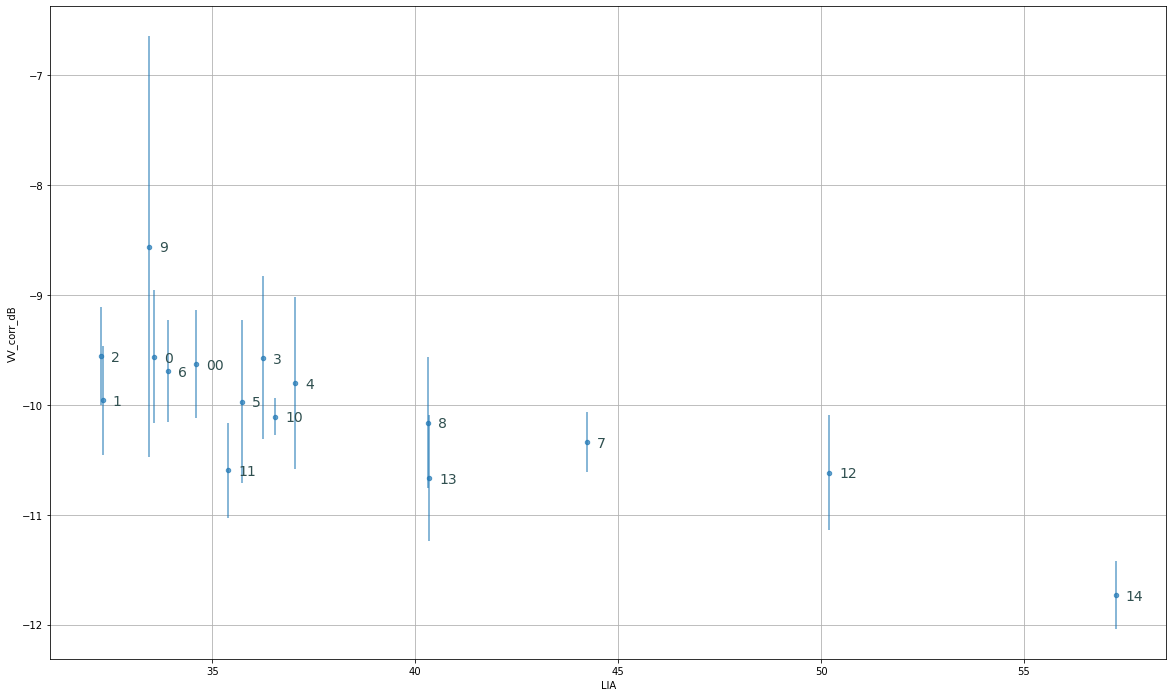

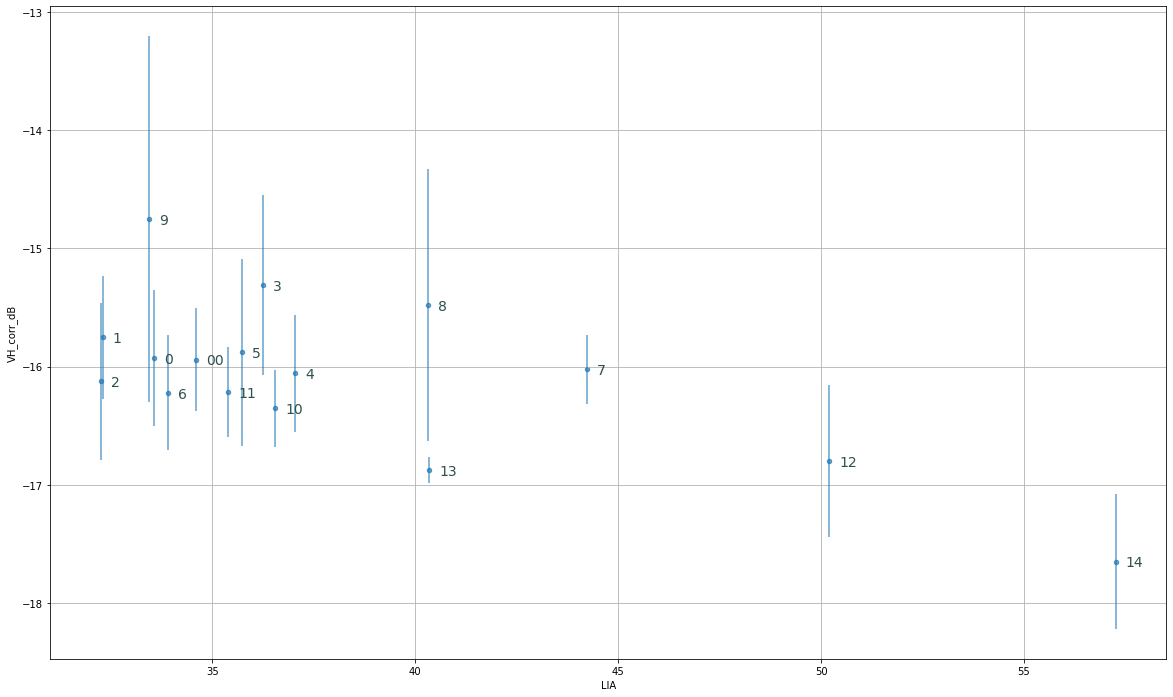

In [33]:
# preliminares Sentinel - estudio angulo de incidencia

toPlot = ['VV_corr_dB', 'VH_corr_dB']
toPlotStd = ['VV_std', 'VH_std']

# toPlot = ['VV.1_corr_dB', 'VH.1_corr_dB']

for mean, std in zip(toPlot, toPlotStd):
    # anotattedScatter(dataSentinelDes, 'LIA.1', figura)
    # print(mean, std)
    errorBarPlot(dataSentinelDes, 'LIA', mean, std)

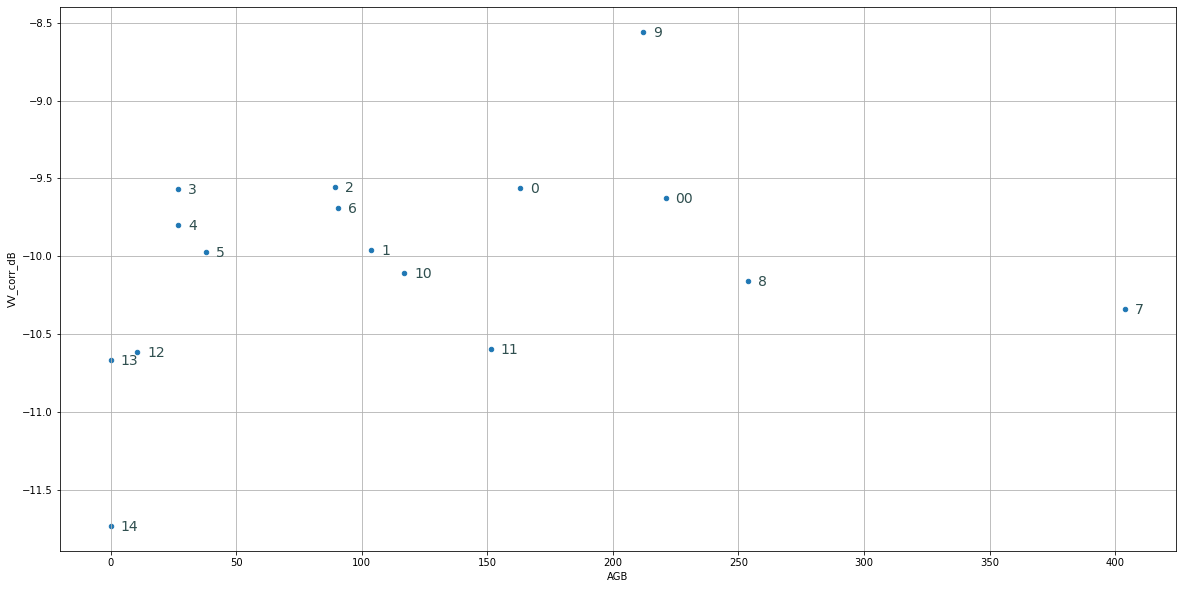

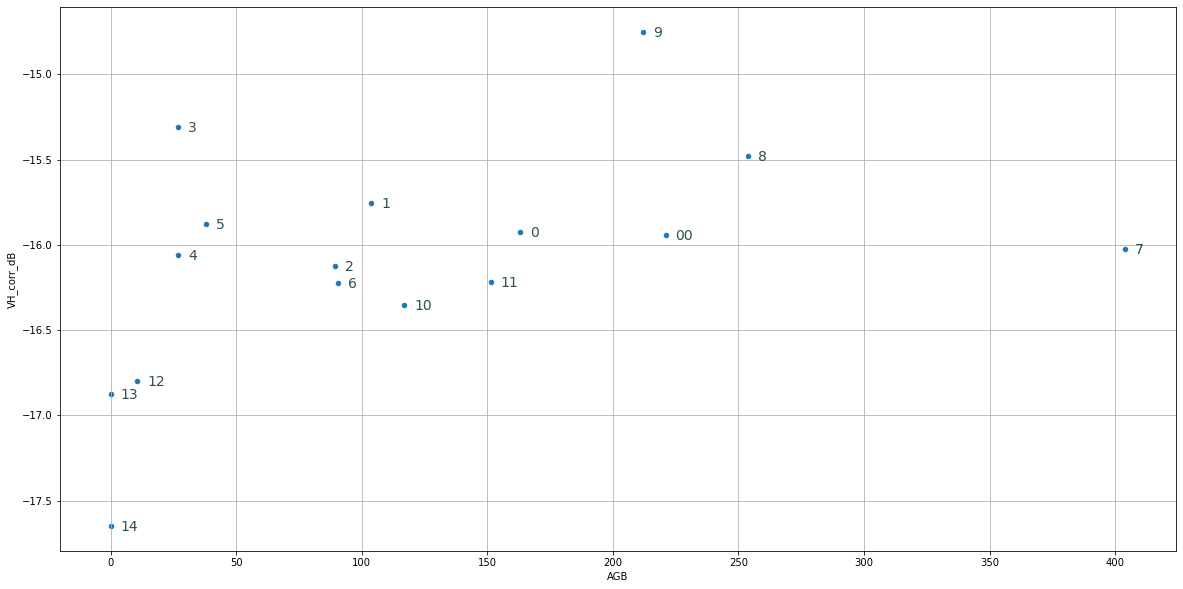

In [34]:
# preliminares Sentinel - estudio Biomasa

toPlot = ['VV_corr_dB', 'VH_corr_dB']

for figura in toPlot:
    anotattedScatter(dataSentinelDes, 'AGB', figura)

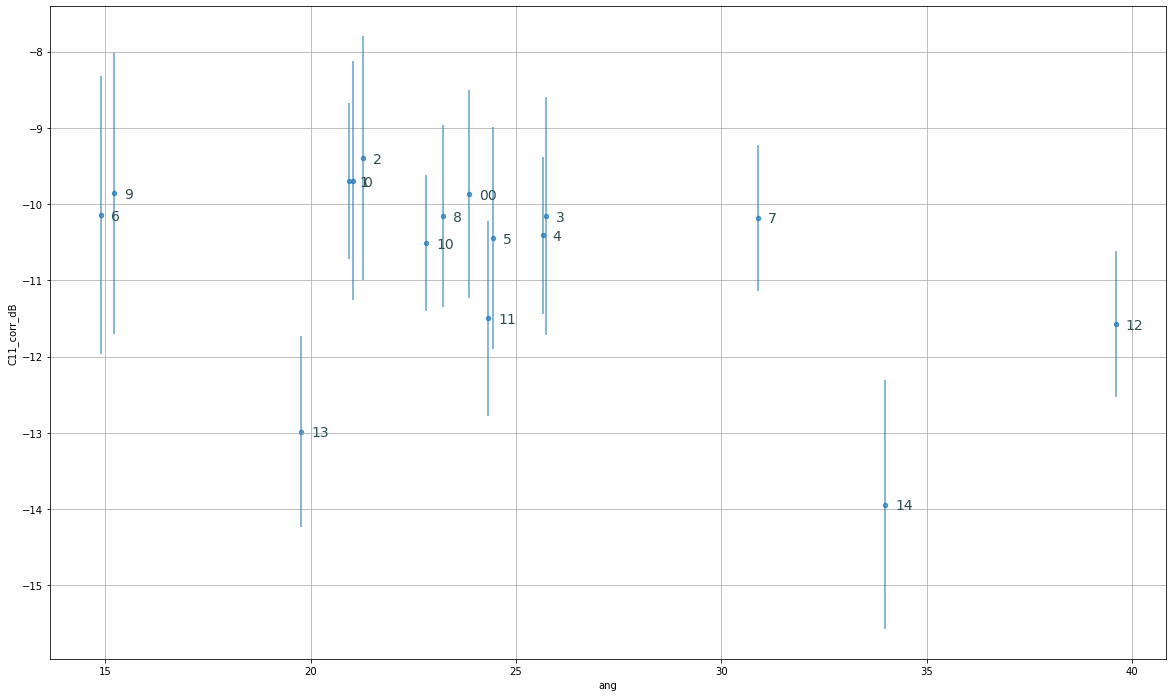

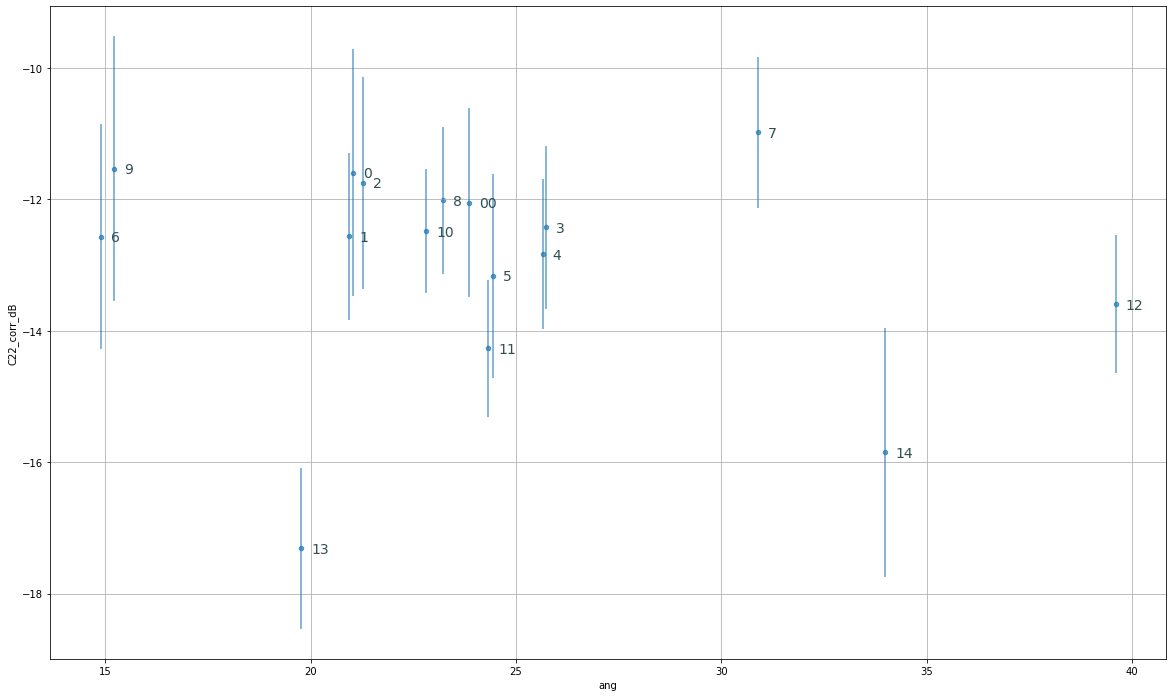

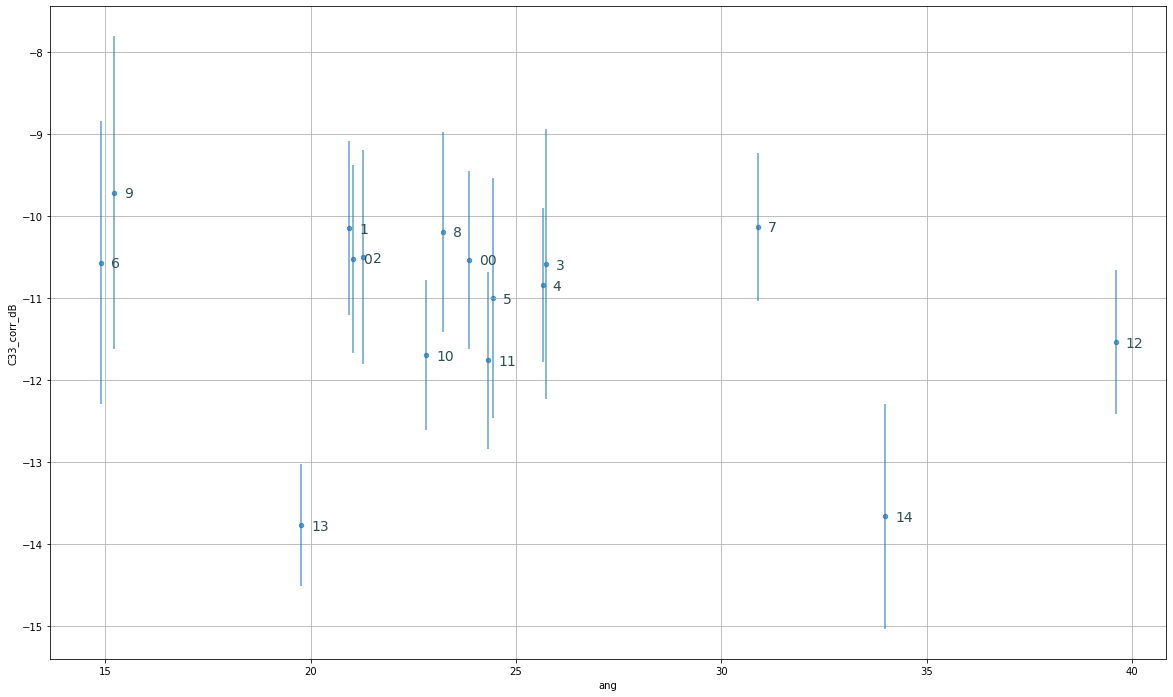

In [35]:
# preliminares SAOCOM - estudio angulo de incidencia

toPlot = ['C11_corr_dB', 'C22_corr_dB', 'C33_corr_dB']
toPlotStd = ['C11_std','C22_std', 'C33_std']

for mean, std in zip(toPlot, toPlotStd):
    # anotattedScatter(dataSentinelDes, 'LIA.1', figura)
    # print(mean, std)
    errorBarPlot(dataSAOCOM, 'ang', mean, std)

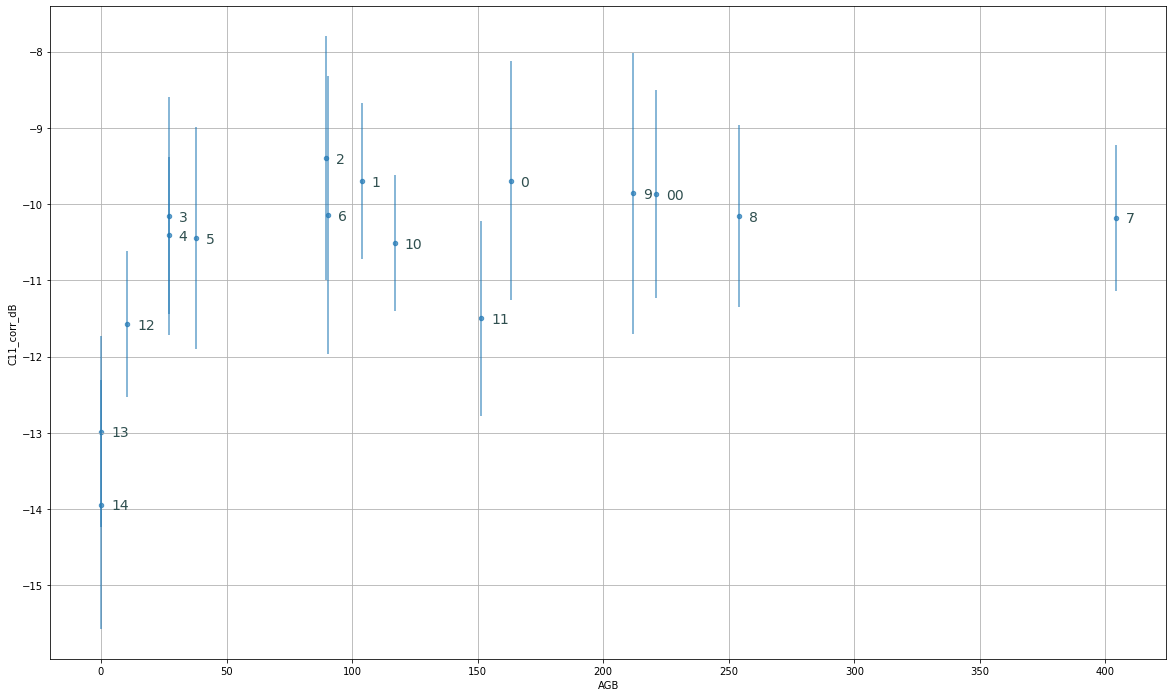

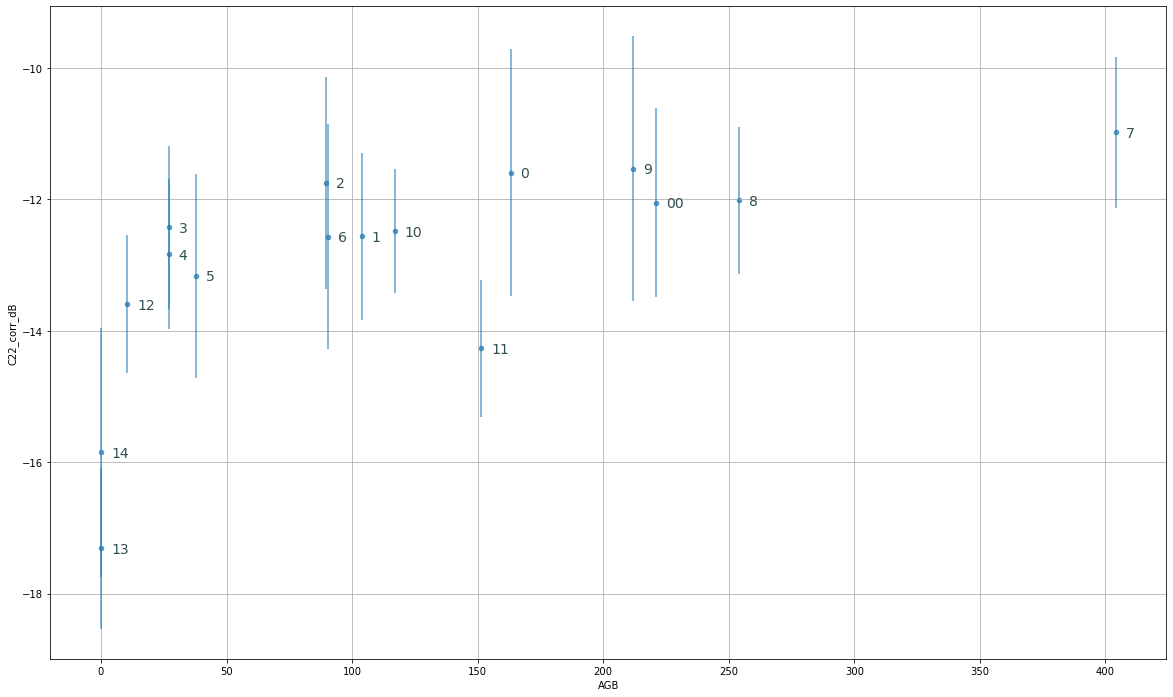

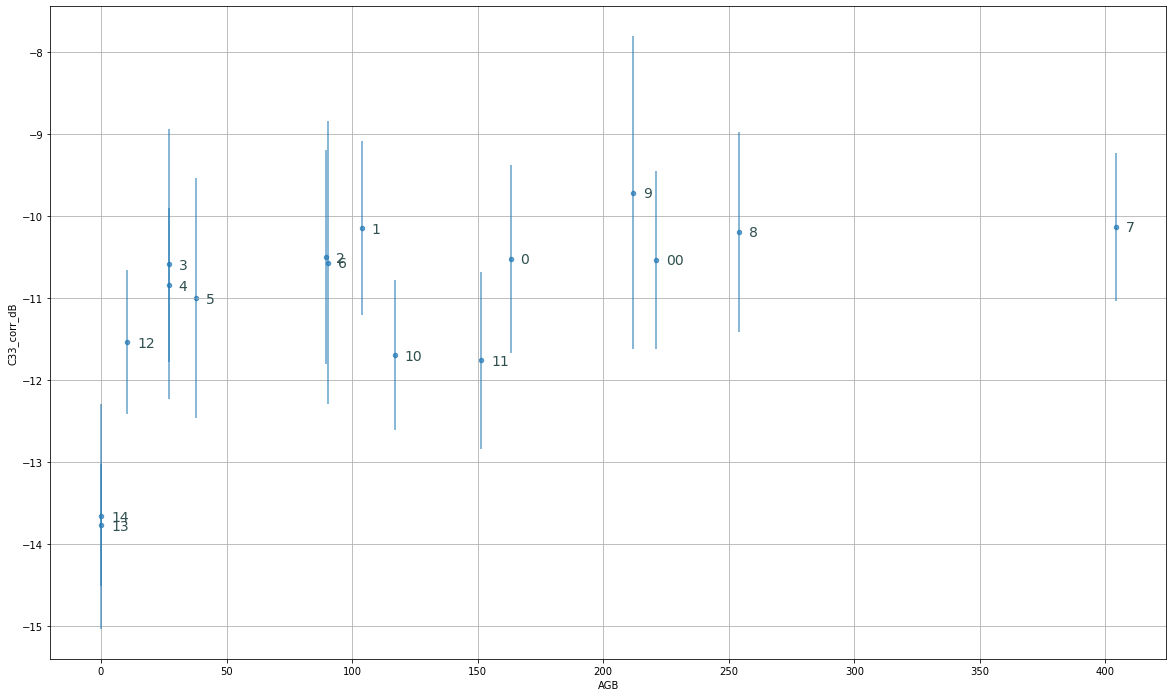

In [36]:
# preliminares SAOCOM - estudio Biomasa

toPlot = ['C11_corr_dB', 'C22_corr_dB', 'C33_corr_dB']
toPlotStd = ['C11_std','C22_std', 'C33_std']

for mean, std in zip(toPlot, toPlotStd):
    # anotattedScatter(dataSentinelDes, 'LIA.1', figura)
    # print(mean, std)
    errorBarPlot(dataSAOCOM, 'AGB', mean, std)

/home/fran/miniconda3/envs/bayes/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


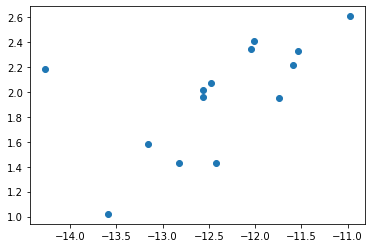

In [37]:
plt.scatter(dataSAOCOM.C22_corr_dB, np.log10(dataSAOCOM.AGB))

In [38]:
# estudio error

# figure(figsize=(20, 6), dpi=80)

# C11_yerr_pos = np.abs(data_AGB['C11_dB'] - 10*np.log10(data_AGB['C11'] + data_AGB['C11_std']))
# C11_yerr_neg = np.abs(data_AGB['C11_dB'] - 10*np.log10(data_AGB['C11'] - data_AGB['C11_std']))

# # C11_yerr_pos = 1*np.ones(data_AGB.C11.shape)
# # C11_yerr_neg = 5*np.ones(data_AGB.C11.shape)

# plt.errorbar(data_AGB['NAME'], data_AGB['C11_dB'], yerr=(C11_yerr_neg, C11_yerr_pos))
# # plt.xticks(rotation=90)
# # plt.plot(data_AGB['NAME'], data_AGB['C11_dB'])
# # plt.plot(data_AGB['NAME'], C11_yerr_pos)
# plt.xticks(rotation=90)

In [39]:
# def toProcessGenerator(df):
#     toProcessMean = []
#     toProcessStd = []
#     for col in df.columns:
#         if '_dB' in col:
#             toProcessMean.append(col)
#             stdName = col.split('_')[0]+'_std'
#             toProcessStd.append(stdName)

#     return toProcessMean, toProcessStd

In [40]:
# toProcessSAOCOMMean, toProcessSAOCOMStd  = toProcessGenerator(data)
# toProcessSentinelMean, toProcessSentinelStd  = toProcessGenerator(dataSentinel)

In [41]:
# toProcessSAOCOMMean, toProcessSAOCOMStd  = ['C11_corr', 'C22_corr', 'C33_corr'], ['C11_std', 'C22_std', 'C33_std']
# # No hay datos de std para las descending

# toProcessSentinelMean = []
# toProcessSentinelStd = []

In [42]:
# '''
# toProcessSAOCOMMean, toProcessSAOCOMStd  = toProcessGenerator(data)
# toProcessSentinelMean, toProcessSentinelStd  = toProcessGenerator(dataSentinel)
# '''

# errorBarL(data_AGB, toProcessSAOCOMMean, toProcessSAOCOMStd)

In [43]:
# data_AGB[['C11_corr_pos', 'C11_corr_neg']]

In [44]:
# errorBarL(dataSentinel_AGB, toProcessSentinelMean, toProcessSentinelStd)

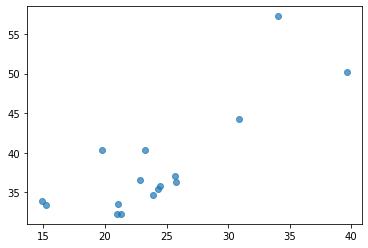

In [45]:
# Estudio angulos SAOCOM vs Sentinel

plt.scatter(dataSAOCOM['ang'], dataSentinelDes['LIA'], alpha=0.7) #figsize=(20, 12), grid=True

# for i, txt in enumerate(data_AGB.NAME):
#    striped = txt.split('O')[1]
#    ax.annotate(striped, (data_AGB['ang.1'][i], data_AGB['ang'][i]), xytext=(10,-5), textcoords='offset points',
#                 family='sans-serif', fontsize=14, color='darkslategrey')  

In [46]:
# Polarimetria

In [47]:
dataSAOCOM.columns

Index(['NAME', 'Biomasa_nire_m3/ha', 'Bio_nire_std', 'Bio_total_std', 'AGB',
       'C11', 'C12r', 'C12i', 'C13r', 'C13i', 'C22', 'C23r', 'C23i', 'C33',
       'ang', 'C11_std', 'C12r_std', 'C12i_std', 'C13r_std', 'C13i_std',
       'C22_std', 'C23r_std', 'C23i_std', 'C33_std', 'ang_std', 'ENL_C3',
       'C11_corr', 'C12r_corr', 'C12i_corr', 'C13r_corr', 'C13i_corr',
       'C22_corr', 'C23r_corr', 'C23i_corr', 'C33_corr', 'C11_corr_dB',
       'C22_corr_dB', 'C33_corr_dB'],
      dtype='object')

In [48]:
C11 = dataSAOCOM['C11_corr'].values#, 'C11std', 
C12 = 1j*dataSAOCOM['C12i_corr'].values + dataSAOCOM['C12r_corr'].values #'C12istd','C12rstd', 
C13 = 1j*dataSAOCOM['C13i_corr'].values + dataSAOCOM['C13r_corr'].values #'C13istd', 'C13rstd', 
C22 = dataSAOCOM['C22_corr'].values #'C22std', 
C23 = 1j*dataSAOCOM['C23i_corr'].values + dataSAOCOM['C23r_corr'].values # 'C23istd',  'C23rstd', 
C33 = dataSAOCOM['C33_corr'].values #, 'C33std'
C21 = np.conjugate(C12)
C31 = np.conjugate(C13)
C32 = np.conjugate(C23)
C = np.asarray([[C11, C12, C13], [C21, C22, C23], [C31, C32, C33]])

In [49]:
Q = np.zeros((C.shape[2],3,3), dtype=complex)

for i in range(C.shape[2]):
    Q[i,:,:] = C[:,:,i]
    
# list(C.reshape((54, 3, 3)))

In [50]:
# for i in range(C.shape[2]):
#     print(C[:,:,i] == Q[i,:,:])

# testeo parte imag C12
# Q_ = C.reshape((54, 3, 3), order='C')

# for i in range(3):
#     for j in range(3):
#         print(C[0,1,:] == Q_[:,i,j])

# type(Q_) == type(C)

# C_ = C.reshape((54,3,3))
# T = np.zeros(C_.shape, dtype = complex)
# for parcela in range(T.shape[0]):
#     T[parcela,:,:] = CaT(C_[parcela,:,:])

In [51]:
dataSAOCOM['C'] = list(Q)

In [52]:
dataSAOCOM.columns

Index(['NAME', 'Biomasa_nire_m3/ha', 'Bio_nire_std', 'Bio_total_std', 'AGB',
       'C11', 'C12r', 'C12i', 'C13r', 'C13i', 'C22', 'C23r', 'C23i', 'C33',
       'ang', 'C11_std', 'C12r_std', 'C12i_std', 'C13r_std', 'C13i_std',
       'C22_std', 'C23r_std', 'C23i_std', 'C33_std', 'ang_std', 'ENL_C3',
       'C11_corr', 'C12r_corr', 'C12i_corr', 'C13r_corr', 'C13i_corr',
       'C22_corr', 'C23r_corr', 'C23i_corr', 'C33_corr', 'C11_corr_dB',
       'C22_corr_dB', 'C33_corr_dB', 'C'],
      dtype='object')

In [53]:
# df = pd.DataFrame({"A":[3,4],"B":[5,6],"C":[7,8]}, index=["a","b"])
# df
# df['otraMas'] = [[1,2], [3,4]]
# df['ultima'] = [[[1,2],[1,2]], [[3,4],[3,4]]]
# cacona = [[[1,2],[1,2]], [[3,4],[3,4]]]
# df['mas'] = cacona


In [54]:
print(dataSAOCOM['C'][0])

[[ 0.10726864+0.j          0.00042379+0.00231064j  0.02914759-0.00235641j]
 [ 0.00042379-0.00231064j  0.06935457+0.j         -0.00039765+0.00116487j]
 [ 0.02914759+0.00235641j -0.00039765-0.00116487j  0.08874906+0.j        ]]


In [55]:
def CaT(C):
    '''
    Pasa de Matriz C a Matriz T.
    Toma como entrada una matriz de 3x3
    '''
    # print(C)
    T = np.zeros((3,3), dtype = complex)
    T[0,0] = C[0,0] + C[2,2] + 2*np.real(C[0,2])
    T[0,1] = C[0,0] - C[2,2] - 2j*np.imag(C[0,2])
    T[0,2] = np.sqrt(2)*(C[0,1] + C[2,1])
    T[1,0] = np.conjugate(T[0,1])
    T[1,1] = C[0,0] + C[2,2] - 2*np.real(C[0,2])
    T[1,2] = np.sqrt(2)*(C[0,1] - C[2,1])
    T[2,0] = np.conjugate(T[0,2])
    T[2,1] = np.conjugate(T[1,2])
    T[2,2] = 2*C[1,1]
    return T

In [56]:
dataSAOCOM['T'] = dataSAOCOM['C'].apply(lambda row: CaT(row)) #axis=1

In [57]:
# Prueba matriz CaT
# Cprueba = C[:,:,10]
# print(Cprueba)
# print(np.around(CaT(Cprueba), 4))


In [58]:
# dataSAOCOM.to_csv('datosViejosMati.csv')

In [59]:
# cuca = pd.read_csv('datosViejosMati.csv', encoding='latin', delimiter = ',')

In [60]:
# cuca.head

In [61]:
# Indicadores que dependen de T

def H(M):
    '''
    calcula Entropia polarimetrica H
    '''
    d,V = np.linalg.eig(M)
   
    #l = np.zeros(3)
    autval = np.zeros(3)
    prb = np.zeros(3)
   
    for k in range(0,2):
        #l[k] = d[k]
#         if l[k] < 0.00001:
#             l[k]=0
        autval[k] = (np.real(d[k]))
    for k in range(0,2):
        prb[k] = autval[k]/sum(autval)

    #calculo de H
    res = 0
    for i in range(0,2):
            if not prb[i] == 0:
                res = res - prb[i]*np.log10(prb[i])/np.log10(3)
    return res

def alfa(M):
    '''
    calcula el angulo alfa polarimetrico alfa
    '''
    d,V = np.linalg.eig(M)
    idx = d.argsort()[::-1] #ordeno los autovalores de forma descendente
   
    l = np.real(d[idx])
    V = V[:,idx]
   
    # Independent target decomposition (T3 seen as the sum of three independent targets represented by a single scattering matrix T3li, i=1,2,3)
#     T3l1 = d[0]*V[:,0]*V[:,0].T
#     T3l2 = d[1]*V[:,1]*V[:,1].T
#     T3l3 = d[2]*V[:,2]*V[:,2].T

    # Target vector associated to max value eigenvalue l1
#     k1 = np.sqrt(d[0])*V[:,0]
#     kAbs = abs(k1)
#     kAngle = angle(k1)
#     k1 = kAbs*exp(1j*kAngle) # notacion exponencial siguiendo ec. 7.4
    p = np.zeros(3)
    alpha = np.zeros(3)
   
    for i in range(0,2):
        p[i] = l[i]/sum(l) #ordenados de mayor a menor probabilidad
        alpha[i] = np.arccos(abs(V[i,0]))*180/np.pi # Given the revised parameterization of the 3x3 U3 matrix (see 7.6, pag. 231, Lee-Pottier)

    alpha0 = sum(alpha*p)   # promedio de los alpha

#     A = (l(1)-l(2))/(l(1)+l(2)) # Anisotropia
#     alpha1 = alpha(0) # el alpha dominante (el que tiene la probabilidad mas grande)
#     alpha2 = alpha(1) # el segundo alpha (el que tiene la probabilidad intermedia)
#     alpha3 = alpha(2) # el alpha marginal (el que tiene la probabilidad mas baja)
   
    return alpha0

def anisotropy(M):
    '''
    calcula la anisotropia polarimetrica A
    '''
    d,V = np.linalg.eig(M)
    autoval = np.real(d)       
    L = np.sort(autoval) # los ordena de menor a mayor: L[0]<L[1]<L[2]
   
    return (L[1]-L[0])/(L[1]+L[0]) #(L[2]-L[1])/(L[2]+L[1])#,(L[1]-L[0])/(L[1]+L[0]), L[0]/L[2]]

def anisotropiaDeFranco(M):
    '''
    calcula la anisotropia polarimetrica A
    '''
    d,V = np.linalg.eig(M)
    autoval = np.real(d)       
    L = np.sort(autoval) # los ordena de menor a mayor: L[0]<L[1]<L[2]
   
    return (L[2]-L[1])/(L[2]+L[1]) #(L[2]-L[1])/(L[2]+L[1])#,(L[1]-L[0])/(L[1]+L[0]), L[0]/L[2]]


def copol_par(M):
    '''
    parámetro de co-polarización
    '''
   
    return np.real(M[0,0]/M[1,1])

def geom_intens(M):
    '''
    intensidad geométrica
    '''
    return abs(np.linalg.det(M))**(1/3)

def diffFaseCopol(M):
    '''
    Diferencia de fase copol
    '''
    return np.rad2deg(np.arctan2(-0.5*np.imag(M[0,1]), 0.25*np.real((M[0,0]-M[1,1]))))

def alturaPedestal(M):
    '''
    calcula la altura pedesta
    '''
    d,V = np.linalg.eig(M)
    autoval = np.real(d)
    L = np.sort(autoval) # los ordena de menor a mayor: L[0]<L[1]<L[2]
   
    return L[0]/L[2] #(L[2]-L[1])/(L[2]+L[1])#,(L[1]-L[0])/(L[1]+L[0]), L[0]/L[2]]

def absHHVV(M):
    '''
    calcula abs HHVV
    '''
    r = 0.25*(M[0,0] - M[1,1])
    i = -0.5*np.imag(M[0,1])
    return np.sqrt(np.real(r**2+i**2)) #(L[2]-L[1])/(L[2]+L[1])#,(L[1]-L[0])/(L[1]+L[0]), L[0]/L[2]]

In [62]:
# Indicadores que dependen de C

def corrCopol(M):
    '''
    correlacion canales copol. Pensamos que tiene a cero si la diferencia de fase es 90 deg. 
    Si la diferencia de fase es 0 o 180, corrCopol tiende a 1. 
    '''
    return np.abs(M[0,2]/np.sqrt(M[0,0]*M[2,2]))

def factorConformidad(M):
    '''
    factor de conformidad
    '''
    return np.real((2*np.real(M[0,2])-0.5*M[1,1])/(M[0,0]+M[1,1]+M[2,2]))

def gamma(M):
    '''
    cociente canales copol
    '''
    return np.real(M[0,0]/M[2,2])

def HV_copol(M):
    '''
    cociente HV divido canales copol
    '''
    return np.real(M[1,1]/(M[0,0]+M[2,2]))/np.sqrt(2)



In [63]:
# Prueba matriz CaT
Cprueba = C[:,:,10]
T = CaT(Cprueba)
print(Cprueba)
print(T)

[[0.10334854+0.j         0.00579906+0.0089617j  0.04188781-0.00182034j]
 [0.00579906-0.0089617j  0.07027253+0.j         0.00210195-0.00745013j]
 [0.04188781+0.00182034j 0.00210195+0.00745013j 0.10681111+0.j        ]]
[[ 0.29393527+0.j         -0.00346257+0.00364067j  0.01117371+0.02320983j]
 [-0.00346257-0.00364067j  0.12638404+0.j          0.0052285 +0.00213768j]
 [ 0.01117371-0.02320983j  0.0052285 -0.00213768j  0.14054505+0.j        ]]


In [64]:
print('H: '+str(H(T)))
print('Alfa: '+str(alfa(T)))
print('A: '+str(anisotropy(T)))
print('p-copol: '+str(copol_par(T)))
print('geom_intens: '+str(geom_intens(T)))
print('diffFaseCopol: '+str(diffFaseCopol(T)))
print('alturaPedestal: '+str(alturaPedestal(T)))
print('absHHVV: '+str(absHHVV(T)))
print('corrCopol: '+str(corrCopol(Cprueba)))
print('factorConformidad: '+str(factorConformidad(Cprueba)))
print('gamma: '+str(gamma(Cprueba)))
print('HV_copol: '+str(HV_copol(Cprueba)))

H: 0.5689798113481518
Alfa: 26.885055966273413
A: 0.05772399207426168
p-copol: 2.3257309501876287
geom_intens: 0.1724023719697166
diffFaseCopol: -2.4883611902338636
alturaPedestal: 0.41471987113292164
absHHVV: 0.04192734266465673
corrCopol: 0.3990588468449978
factorConformidad: 0.17344425908456282
gamma: 0.9675822744400232
HV_copol: 0.23644015261251944


In [65]:
# H_ = np.zeros(T.shape[0])
# for parcela in range(T.shape[0]):
#     H_[parcela] = H(T[parcela,:,:])

In [66]:
# batch polarimetrico

dataSAOCOM['H'] = dataSAOCOM['T'].apply(lambda row: H(row))
dataSAOCOM['Alfa'] = dataSAOCOM['T'].apply(lambda row: alfa(row))
dataSAOCOM['A'] = dataSAOCOM['T'].apply(lambda row: anisotropy(row))
dataSAOCOM['AFranco'] = dataSAOCOM['T'].apply(lambda row: anisotropiaDeFranco(row))
dataSAOCOM['p-copol'] = dataSAOCOM['T'].apply(lambda row: copol_par(row))
dataSAOCOM['geom_intens'] = dataSAOCOM['T'].apply(lambda row: geom_intens(row))
dataSAOCOM['diffFaseCopol'] = dataSAOCOM['T'].apply(lambda row: diffFaseCopol(row))
dataSAOCOM['alturaPedestal'] = dataSAOCOM['T'].apply(lambda row: alturaPedestal(row))
dataSAOCOM['absHHVV'] = dataSAOCOM['T'].apply(lambda row: absHHVV(row))
dataSAOCOM['corrCopol'] = dataSAOCOM['C'].apply(lambda row: corrCopol(row))
dataSAOCOM['factorConformidad'] = dataSAOCOM['C'].apply(lambda row: factorConformidad(row))
dataSAOCOM['gamma'] = dataSAOCOM['C'].apply(lambda row: gamma(row))
dataSAOCOM['HV_copol'] = dataSAOCOM['C'].apply(lambda row: HV_copol(row))

In [67]:
dataSAOCOM[['H','Alfa','A']].head()

,H,Alfa,A
0,0.592206,26.067732,0.037570
1,0.586839,26.876653,0.070807
2,0.540118,26.449567,0.126114
3,0.551049,25.241993,0.061449
4,0.571479,25.385262,0.063657


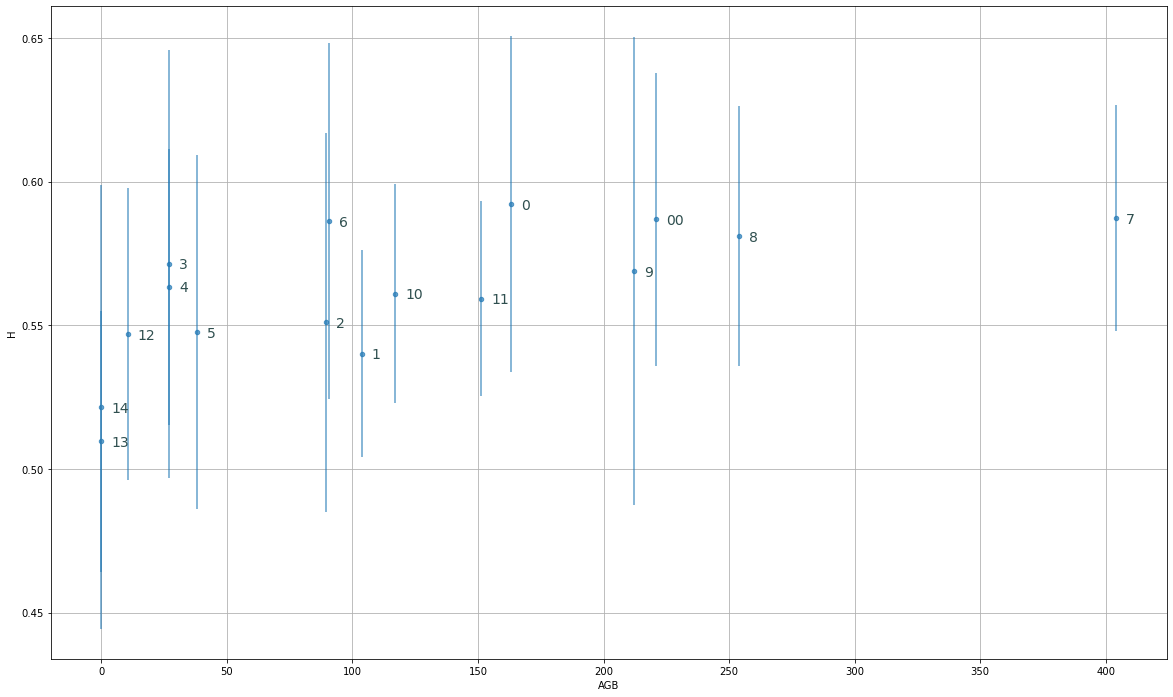

In [150]:
# Estudio intro polarimetrico

# anotattedScatter(dataSAOCOM, 'AGB', 'H')
# errorBarPolPlot(dataSAOCOM, 'AGB', 'H', 'H_std')
errorBarPolPlot(dataSAOCOM, 'AGB', 'H', 'H_up', 'H_down')

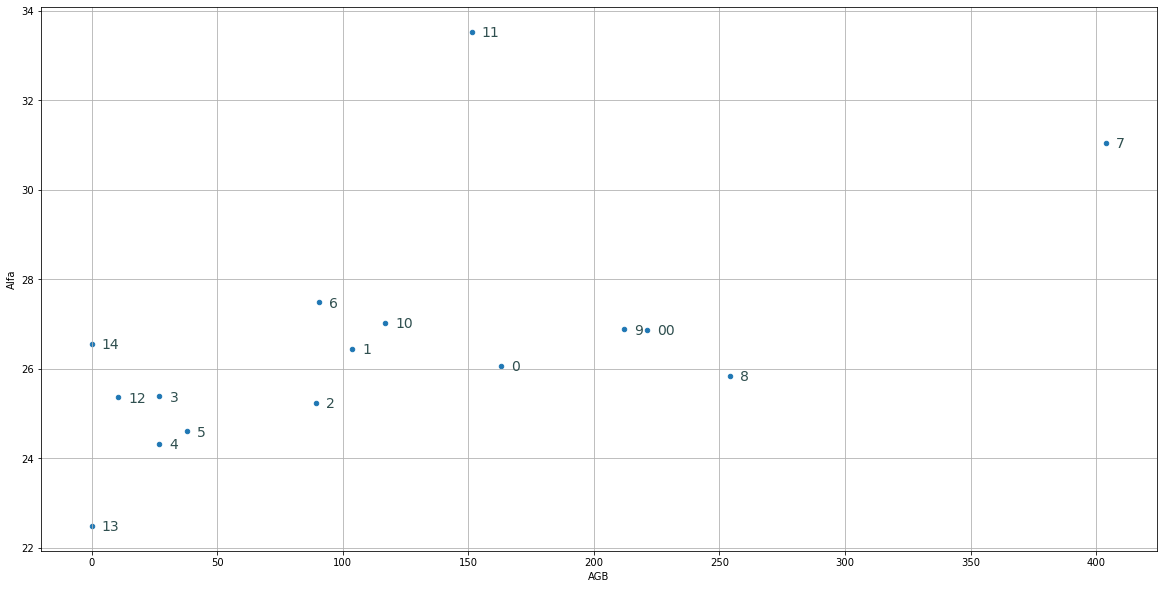

In [69]:
anotattedScatter(dataSAOCOM, 'AGB', 'Alfa')

# plt.scatter(dataSAOCOM['AGB'], dataSAOCOM['Alfa'])
# plt.ylim([0, 90])

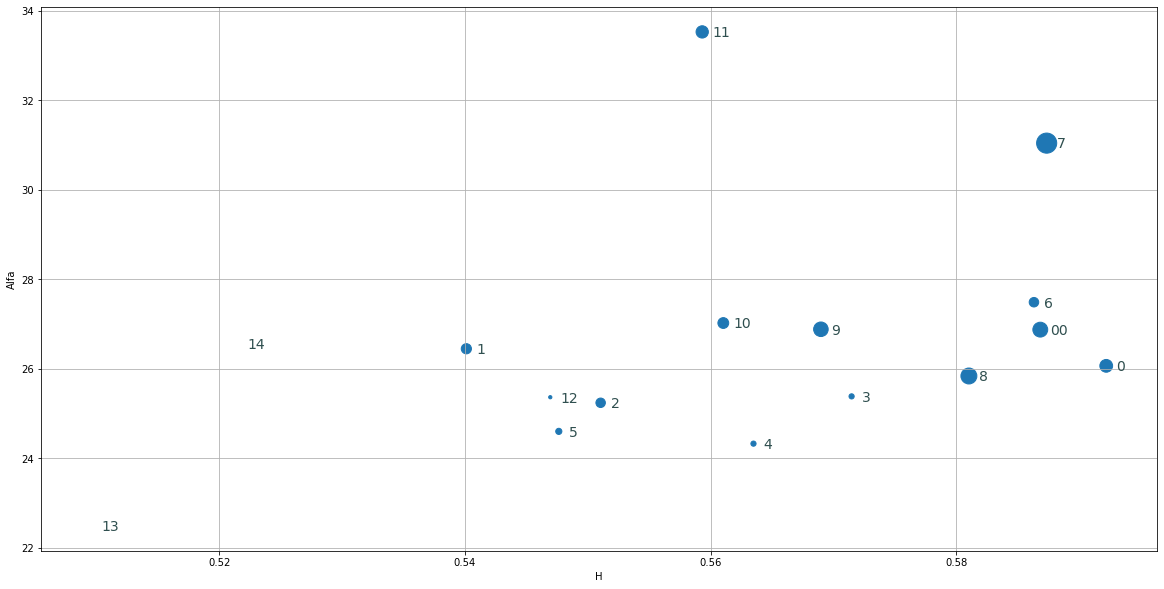

In [70]:
# anotattedScatter(dataSAOCOM, 'H', 'Alfa')


anotattedBubbleScatter(dataSAOCOM, 'H', 'Alfa', 'AGB')

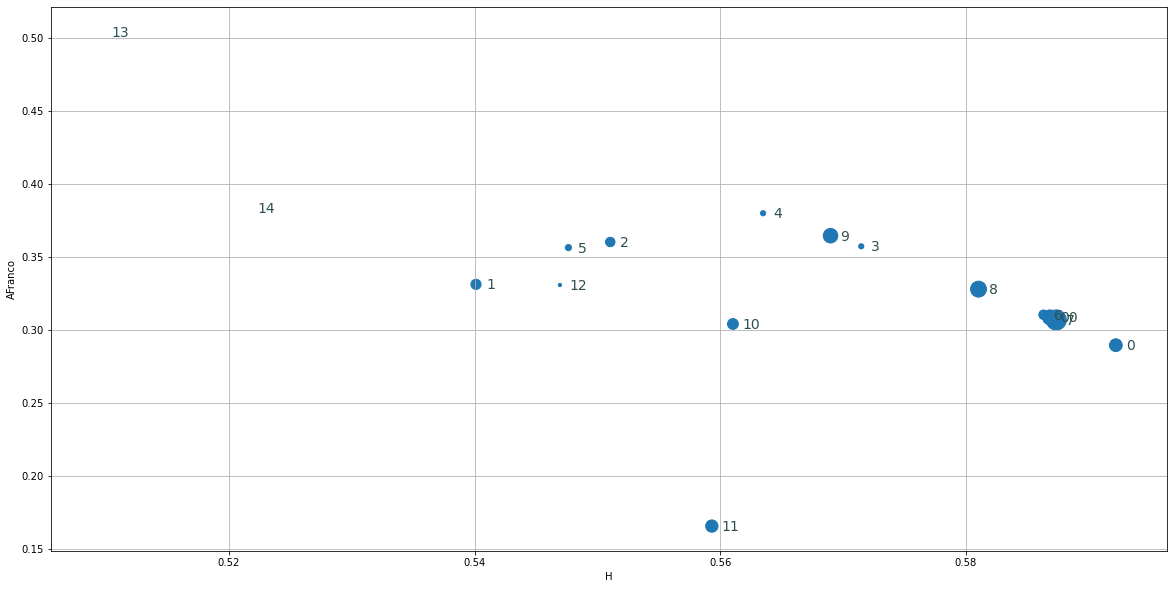

In [71]:
anotattedBubbleScatter(dataSAOCOM, 'H', 'AFranco', 'AGB')

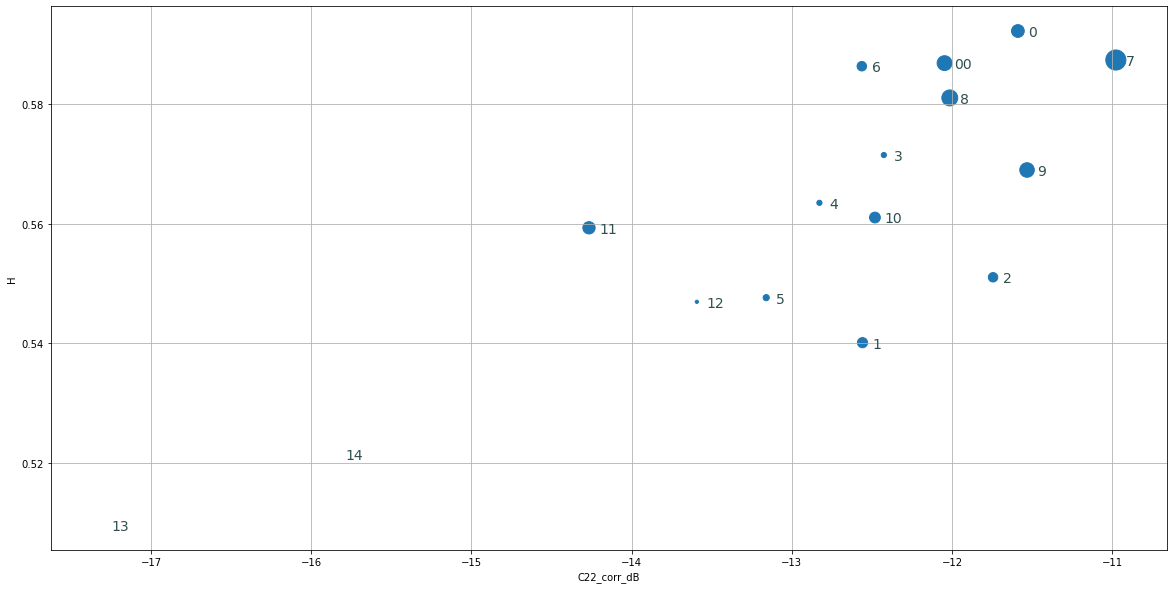

In [72]:
anotattedBubbleScatter(dataSAOCOM, 'C22_corr_dB', 'H', 'AGB')

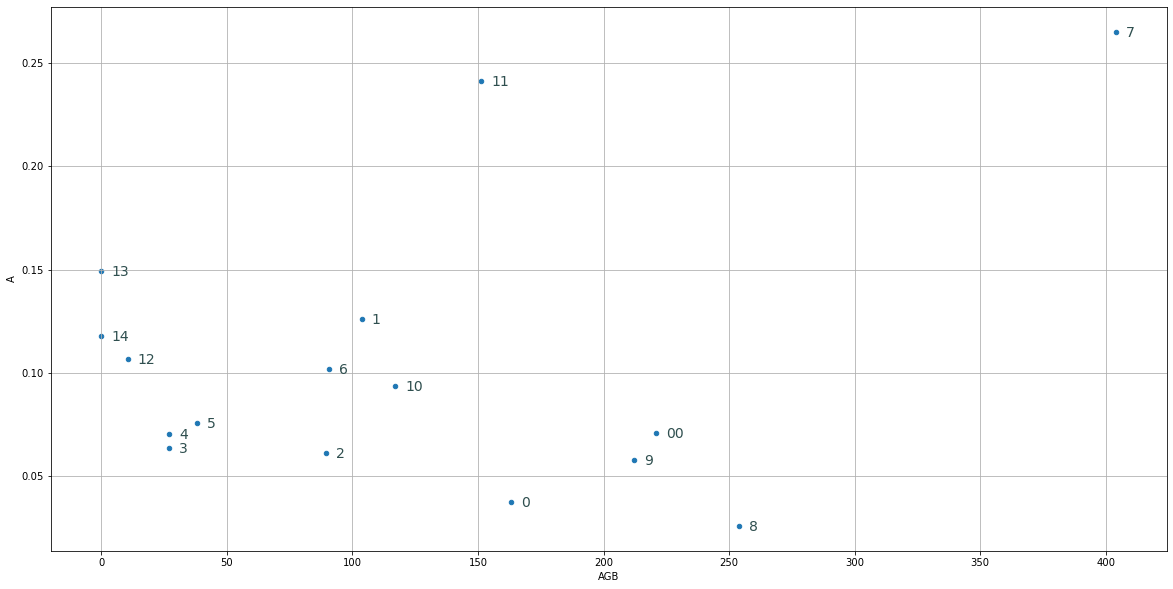

In [73]:
anotattedScatter(dataSAOCOM, 'AGB', 'A')

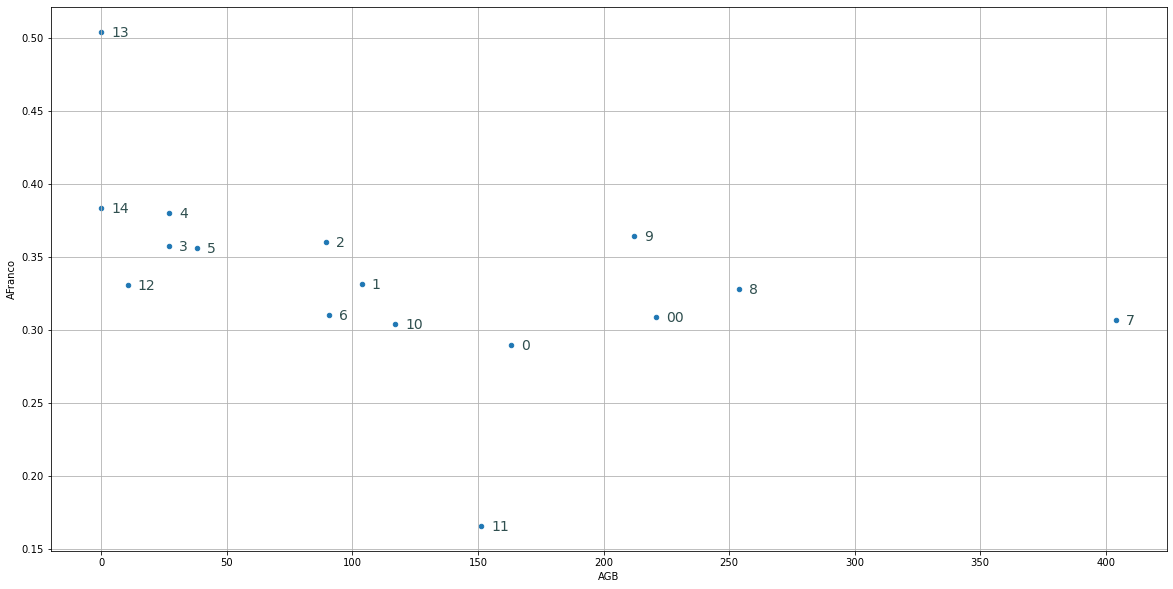

In [74]:
anotattedScatter(dataSAOCOM, 'AGB', 'AFranco')

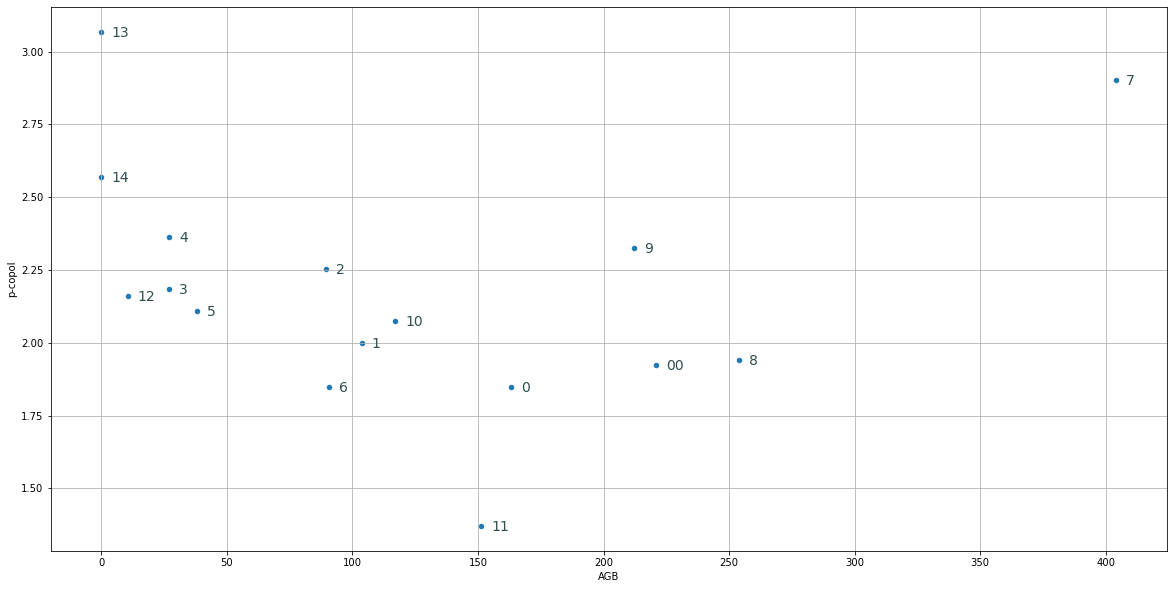

In [75]:
anotattedScatter(dataSAOCOM, 'AGB', 'p-copol')

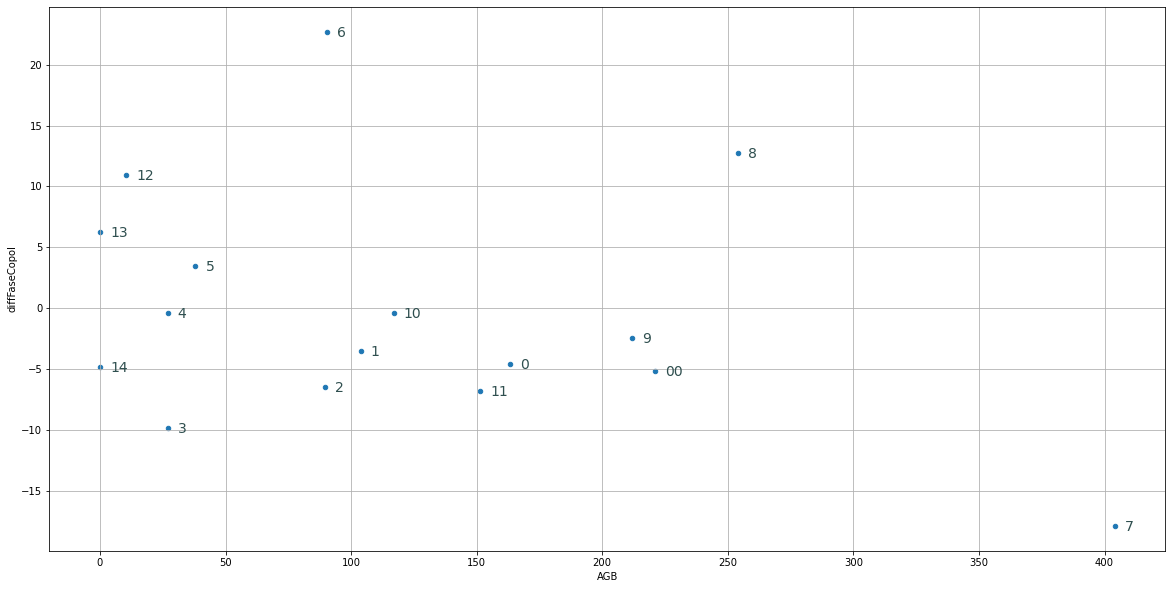

In [76]:
anotattedScatter(dataSAOCOM, 'AGB', 'diffFaseCopol')
# dataSAOCOM['diffFaseCopol']

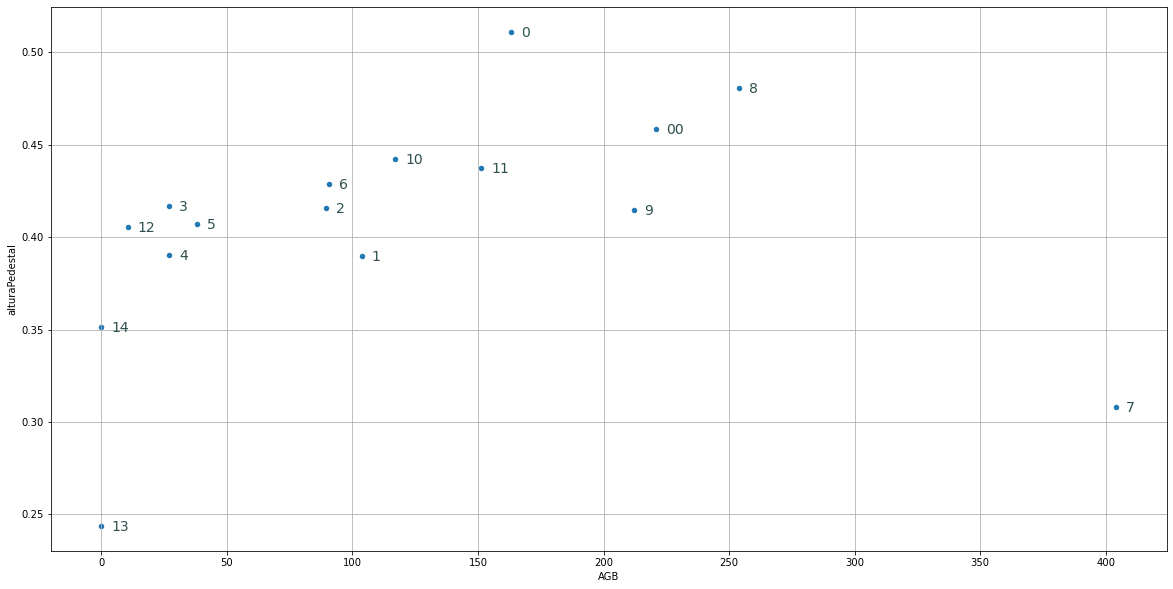

In [77]:
anotattedScatter(dataSAOCOM, 'AGB', 'alturaPedestal')

# dataSAOCOM['alturaPedestal'] = dataSAOCOM['T'].apply(lambda row: alturaPedestal(row))
# dataSAOCOM['corrCopol'] = dataSAOCOM['C'].apply(lambda row: corrCopol(row))
# dataSAOCOM['factorConformidad'] = dataSAOCOM['C'].apply(lambda row: factorConformidad(row))
# dataSAOCOM['gamma'] = dataSAOCOM['C'].apply(lambda row: gamma(row))

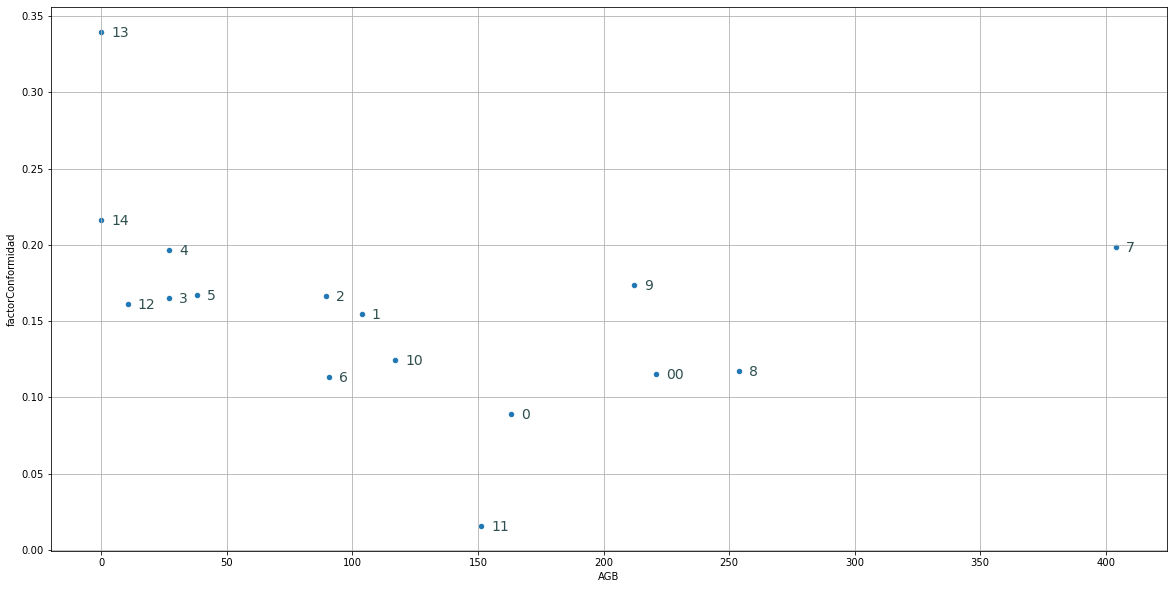

In [78]:
anotattedScatter(dataSAOCOM, 'AGB', 'factorConformidad')


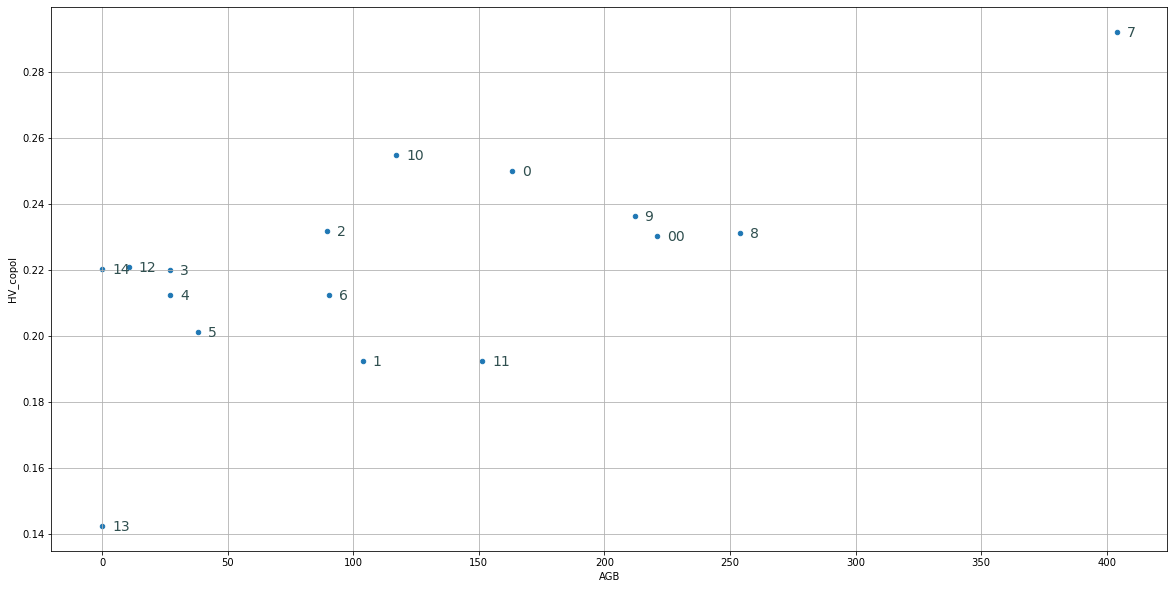

In [79]:
anotattedScatter(dataSAOCOM, 'AGB', 'HV_copol')

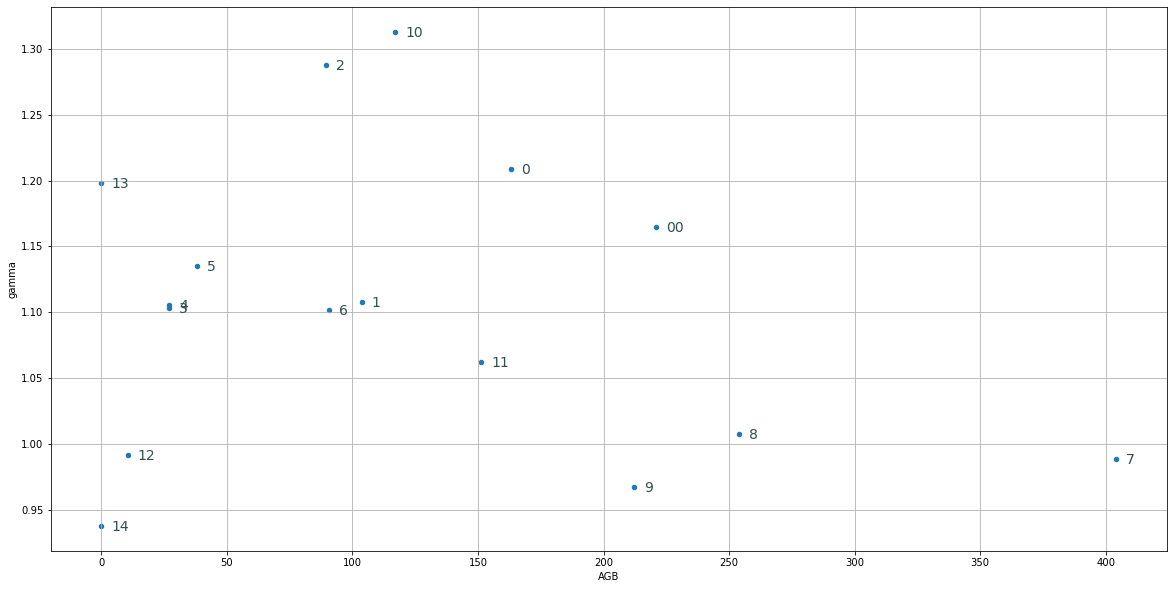

In [80]:
anotattedScatter(dataSAOCOM, 'AGB', 'gamma')

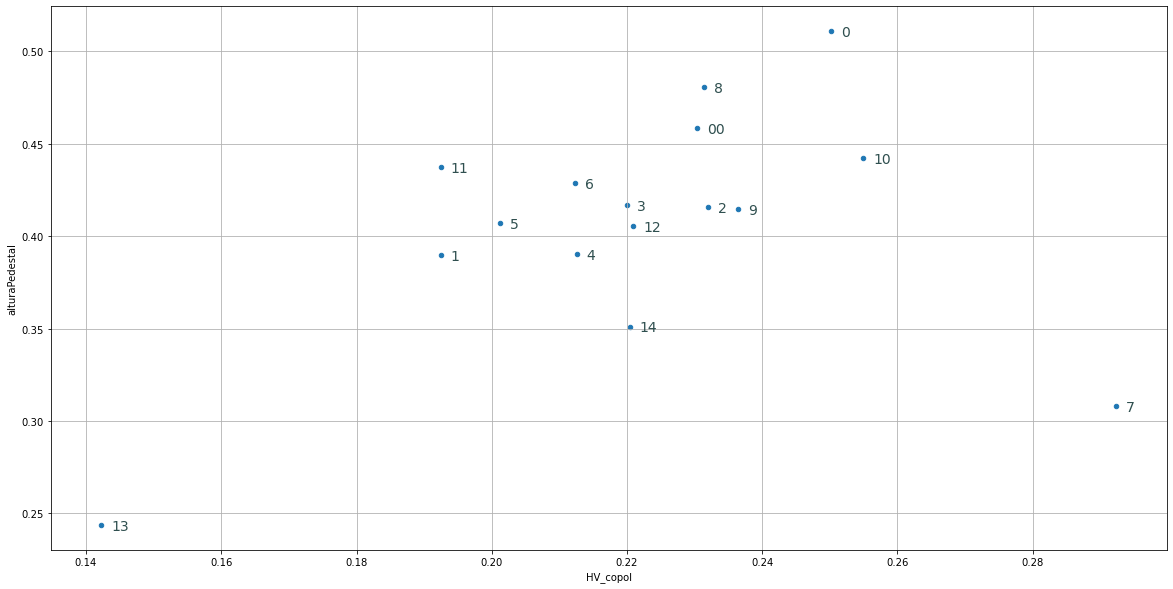

In [81]:
anotattedScatter(dataSAOCOM, 'HV_copol', 'alturaPedestal')

In [82]:
# Inferencia

In [83]:
RANDOM_SEED = 8927
# rng = np.random.default_rng(RANDOM_SEED)
# size = 200
# true_intercept = 1
# true_slope = 2

# x = np.linspace(0, 1, size)
# # y = a + b*x
# true_regression_line = true_intercept + true_slope * x
# # add noise
# y = true_regression_line + rng.normal(scale=0.5, size=size)

In [84]:
dataSAOCOM.ENL_C3

0     14.764133
1     19.191084
2     28.689054
3     14.791836
4     11.757209
5     25.101576
6     14.680730
7     13.757422
8     29.280306
9     22.891960
10    10.301670
11    34.757515
12    23.344919
13    22.895128
14    32.207874
15    12.523021
Name: ENL_C3, dtype: float64

In [85]:
# def errorBarL(df, colListMean, colListStd):
#     ''' 
#     largo barras de error
#     '''
#     pos = np.abs(dB(1 + (df[colListStd]/toPower(df[colListMean]))))
#     neg = np.abs(dB(1 - (df[colListStd]/toPower(df[colListMean]))))

#     return pos, neg

In [86]:
# pos, neg = errorBarL(dataSAOCOM.sort_values('C22_corr_dB'), 'C22_corr_dB', 'C22_std')

In [87]:
# pos

In [88]:
# dataSAOCOM[['AGB','C22_corr', 'C22_std']]

In [89]:
# dB(toPower(dataSAOCOM['C22_corr_dB']) + dataSAOCOM['C22_std']) - dataSAOCOM['C22_corr_dB']

In [90]:
sigmaPorPunto = dB(dataSAOCOM['C22_corr'] + dataSAOCOM['C22_std']) - dataSAOCOM['C22_corr_dB']

In [91]:
sigmaPorPunto

0     1.885261
1     1.443019
2     1.268120
3     1.614666
4     1.235155
5     1.144824
6     1.551513
7     1.705335
8     1.145271
9     1.123779
10    2.019020
11    0.946203
12    1.042996
13    1.047875
14    1.229967
15    1.899931
dtype: float64

In [92]:
# sigmaPorPunto[np.isnan(sigmaPorPunto)] = 2

In [93]:
# sigmaPorPunto

# function [a,d] = cwishrnd(sigma,df,d)

# def cwishrnd(sigma,df,d):
def cwishrnd(sigma,df):
   '''
   generados MC Wishart
   '''
   n,m = sigma.shape
   if n is not m: 
      print('stats:wishrnd:BadCovariance')

   # Factor sigma unless that has already been done
   # if (nargin<3):
   #    [d,p] = cholcov(sigma,1);
   #    if p~=0
   #       error(message('stats:wishrnd:BadCovariance'))
   #    end
   # elseif ~isempty(sigma)
   #    if size(d,2) ~= n || size(d,1) > n
   #       error(message('stats:wishrnd:BadCovFactor'))
   #    end
   # else
   #    n = size(d,2);
   # end

   # if (~isscalar(df)) || (df<=0)
   #    error(message('stats:wishrnd:BadDf'))
   # elseif (df<=n-1) && (df~=round(df))
   #    error(message('stats:wishrnd:BadDf'));
   # end

   # For small degrees of freedom, generate the matrix using the definition
   # of the Wishart distribution; see Krzanowski for example

   d = np.linalg.cholesky(sigma) # suposicion de aca https://www.mathworks.com/help/stats/cholcov.html

   if (df <= 81+n):
      # x = randn(df,size(d,1)) * d;
      
      # x = (np.random.randn(df,d.shape[0]) + 1j*np.random.randn(df,d.shape[0]))/np.sqrt(2) * d # MODIFICACiON
      x = np.matmul((np.random.randn(df,d.shape[0]) + 1j*np.random.randn(df,d.shape[0]))/np.sqrt(2), d.T)

   
   return np.matmul(np.conj(x.T), x)
   # Otherwise use the Smith & Hocking procedure
   # W.B. Smith and R.R. Hocking, “Algorithm AS 53: Wishart Variate Generator”, Applied Statistics, vol. 21, pp. 341-345, 1972.
   # else
   #    % Load diagonal elements with square root of chi-square variates
   #    a = diag(sqrt(chi2rnd(df-(0:n-1))));

   #    # Load upper triangle with independent normal (0, 1) variates
   #    a(itriu(n)) = randn(n*(n-1)/2,1);

   #    # Desired matrix is D'(A'A)D
   #    x = a(:,1:size(d,1))*d;
   # end

   # a = x' * x;


   # # --------- get indices of upper triangle of p-by-p matrix
   # function d=itriu(p)

   # d=ones(p*(p-1)/2,1);
   # d(1+cumsum(0:p-2))=p+1:-1:3;
   # d = cumsum(d);

In [94]:
# prepro inferencia

y_raw = np.log10(dataSAOCOM.sort_values('C22_corr_dB')['AGB']+1) #dataSAOCOM.AGB.values #np.log10(dataSAOCOM.AGB.values)
x_raw = dataSAOCOM.sort_values('C22_corr_dB')['C22_corr_dB']

def ida(x_, x_min, x_max):
    return (x_ - x_min) / (x_max - x_min)

def vuelta(x_, x_min, x_max):
    return x_*(x_max - x_min) + x_min

y_min = y_raw.min()
y_max = y_raw.max()
x_min = x_raw.min()
x_max = x_raw.max()

x_ = ida(x_raw, x_min, x_max)
y_ = ida(y_raw, y_min, y_max)

Text(0, 0.5, 'log(AGB)')

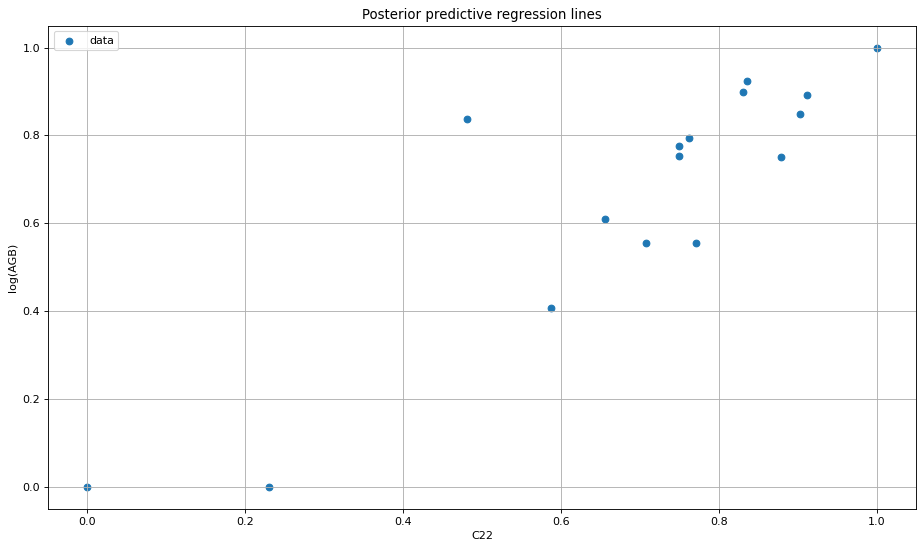

In [95]:
plt.figure(figsize=(14, 8), dpi=80)


plt.scatter(x_, y_, label="data")
plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("C22")
plt.grid(True)
plt.ylabel("log(AGB)")

In [143]:
from scipy import stats

# sigma = C[:,:,6]
# df = 10

# H_dist = np.zeros(10000)
# for i in range(10000):
#     C_sample = cwishrnd(sigma,df)/df
#     # print(C_sample/sigma)
#     # print(C_sample)
#     H_dist[i] = H(C_sample)

# plt.hist(H_dist)
# print(H(sigma))
# print(np.std(H_dist))

# from urllib.parse import quote_plus


def ruidoH(sigma, df):
    '''
    Estima con MC el std de H    
    '''
    H_dist = np.zeros(10000)
    for i in range(10000):
        C_sample = cwishrnd(sigma,df)/df
        H_dist[i] = H(C_sample)

    # plt.hist(H_dist)
    # print(H(sigma))
    return np.std(H_dist)


def ruidoH_Q(sigma, df, q_mas=0.75, q_menos=0.25):
    '''
    Estima con MC cuantile de la distribucion    
    '''
    H_dist = np.zeros(10000)
    for i in range(10000):
        C_sample = cwishrnd(sigma,df)/df
        H_dist[i] = H(C_sample)
    # mode = stats.mode(H_dist)
    q_up = np.quantile(H_dist, q_mas) - H_dist.mean()
    q_down = H_dist.mean() - np.quantile(H_dist, q_menos)

    return q_up, q_down

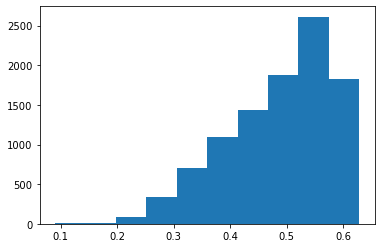

In [144]:
sigma = C[:,:,6]
df = 10
H_dist = np.zeros(10000)
for i in range(10000):
    C_sample = cwishrnd(sigma,df)/df
    H_dist[i] = H(C_sample)
plt.hist(H_dist)

# q_up = np.quantile(H_dist, 0.75)
# q_down = np.quantile(H_dist, 0.25)


In [146]:
ruidoH_Q(sigma, df, q_mas=0.75, q_menos=0.25)

(0.07526823134526839, 0.0636436873701628)

In [1]:
# dataSAOCOM['H_std'] = dataSAOCOM['C'].apply(lambda row: ruidoH(row, int(dataSAOCOM['ENL_C3'])))

# aux_up = []
# aux_down = []
# for i in dataSAOCOM.T:
#     C_ = dataSAOCOM.iloc[i]['C']
#     ENL_ = dataSAOCOM.iloc[i]['ENL_C3']
#     qu, qd = ruidoH_Q(C_, int(ENL_))
#     aux_up.append(qu)
#     aux_down.append(qd)
#     # aux.append(ruidoH(C_, int(ENL_)))

def H_std_calculation(row):
    return ruidoH(row['C'], int(row['ENL_C3']))


dataSAOCOM['H_std'] = dataSAOCOM.apply(lambda row: H_std_calculation(row), axis=1)

NameError: name 'dataSAOCOM' is not defined

In [149]:
dataSAOCOM['H_up'] = aux_up
dataSAOCOM['H_down'] = aux_down

In [99]:

with pm.Model() as model:  # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    # sigma = pm.HalfCauchy("sigma", beta=10) #testval=1.0
    # sigmaObs = pm.HalfNormal('sd', sigma=10)
    # sigmaObs = 0.2
    sigmaObs = sigmaPorPunto
    # sigmaObs = ida(sigmaPorPunto, x_min, x_max)
    intercept = pm.Normal("Intercept", mu=0, sigma=10)
    x_coeff = pm.Normal("x", mu=0, sigma=10)

    # Define likelihood
    likelihood = pm.Normal("y", mu=intercept + x_coeff * x_, sigma=sigmaObs, observed=y_)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    trace = pm.sample(5000, tune=1000) #return_inferencedata=True

    ppc = pm.sample_posterior_predictive(trace, var_names=["y"], samples=10000)


/tmp/ipykernel_7585/2308815231.py:16: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(5000, tune=1000) #return_inferencedata=True
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x, Intercept]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 9 seconds.
The acceptance probability does not match the target. It is 0.8842456527466759, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.886211475264096, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
/home/fran/miniconda3/envs/bayes/lib/python3.9/site-packages/pymc3/sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


/home/fran/miniconda3/envs/bayes/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'x'}>]], dtype=object)

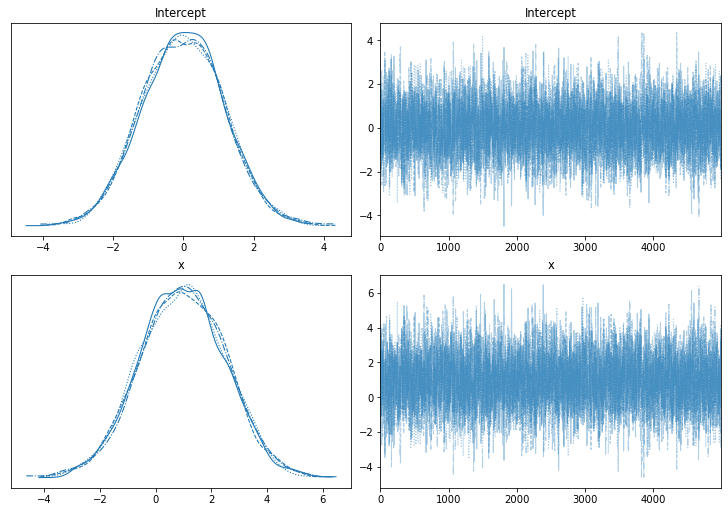

In [100]:
import arviz as az

ppc_y = ppc['y']

az.plot_trace(trace, figsize=(10, 7))

/home/fran/miniconda3/envs/bayes/lib/python3.9/site-packages/pymc3/plots/posteriorplot.py:59: DeprecationWarning: The `plot_posterior_predictive_glm` function will migrate to Arviz in a future release. 
Keep up to date with `ArviZ <https://arviz-devs.github.io/arviz/>`_ for future updates.
  warnings.warn(


Text(0, 0.5, 'log(AGB)')

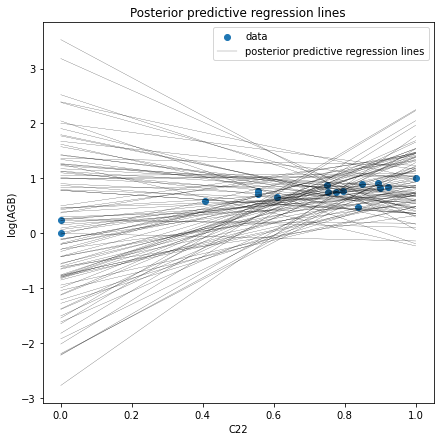

In [101]:
plt.figure(figsize=(7, 7))
# plt.scatter(x_, y, label="data")
plt.scatter(y_, x_, label="data")
pm.plot_posterior_predictive_glm(trace, samples=100, label="posterior predictive regression lines")
# plt.plot(x, true_regression_line, label="true regression line", lw=3.0, c="y")

# for i in range(30):
#     plt.plot(x_, ppc_y[i,:], ':k', alpha = 0.3) #,  label='sample'

plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("C22")
plt.ylabel("log(AGB)")

Text(0, 0.5, 'C22')

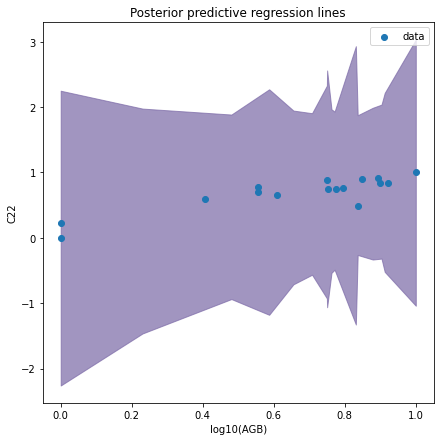

In [102]:
from scipy.stats.mstats import mquantiles

# vectorized bottom and top 2.5# quantiles for "confidence interval"
# qs = mquantiles(p_t, [0.025, 0.975], axis=0)
# plt.fill_between(t[:, 0], *qs, alpha=0.7,
#                  color="#7A68A6")

# plt.plot(t[:, 0], qs[0], label="95% CI", color="#7A68A6", alpha=0.7)

# plt.plot(t, mean_prob_t, lw=1, ls="--", color="k",
#          label="average posterior \nprobability of defect")

# plt.xlim(t.min(), t.max())
# plt.ylim(-0.02, 1.02)
# plt.legend(loc="lower left")
# plt.scatter(temperature, D, color="k", s=50, alpha=0.5)
# plt.xlabel("temp, $t$")

# plt.ylabel("probability estimate")
# plt.title("Posterior probability estimates given temp. $t$");

plt.figure(figsize=(7, 7))
qs = mquantiles(ppc_y, [0.15, 0.85], axis=0)
plt.fill_between(x_, *qs, alpha=0.7, color="#7A68A6")


plt.scatter(y_, x_, label="data")

ppc_y_mean = ppc_y.mean(axis=0)
# plt.plot(y_, np.sort(ppc_y_mean), label="mean")

# for i in range(1):
#     plt.plot(x_, ppc_y[i,:], ':k', alpha = 0.3) #,  label='sample'

plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("log10(AGB)")
plt.ylabel("C22")

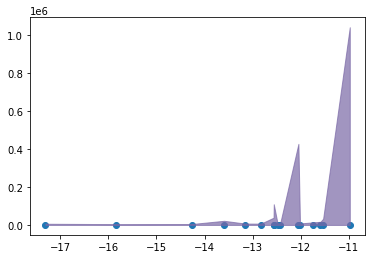

In [103]:
y_vuelta = 10**vuelta(y_, y_min, y_max)
x_vuelta = vuelta(x_, x_min, x_max)
plt.scatter(x_vuelta, y_vuelta)

qs = mquantiles(10**vuelta(ppc_y, y_min, y_max), [0.25, 0.75], axis=0)
plt.fill_between(x_vuelta, *qs, alpha=0.7, color="#7A68A6")

In [104]:
x_

14    0.000000
15    0.230449
12    0.480698
13    0.587022
6     0.655371
5     0.707822
7     0.749624
2     0.750274
11    0.762541
4     0.771328
1     0.831171
9     0.836320
3     0.878972
0     0.903451
10    0.912467
8     1.000000
Name: C22_corr_dB, dtype: float64

In [105]:
y_ = np.log10(dataSAOCOM.sort_values('H')['AGB']+1) #dataSAOCOM.AGB.values #np.log10(dataSAOCOM.AGB.values)
x_ = dataSAOCOM.sort_values('H')['H']

In [106]:
# inferencia H

y_ = np.log10(dataSAOCOM.sort_values('H')['AGB']+1) #dataSAOCOM.AGB.values #np.log10(dataSAOCOM.AGB.values)
x_ = dataSAOCOM.sort_values('H')['H']

y_min = y_.min()
y_max = y_.max()
x_min = x_.min()
x_max = x_.max()

y_ = (y_ - y_min) / (y_max - y_min)
x_ = (x_ - x_min) / (x_max - x_min)
# x_ = np.sort(x_)

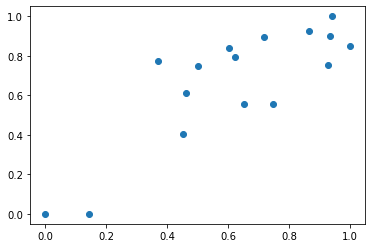

In [107]:
plt.scatter(x_, y_)

Text(0, 0.5, 'log(AGB)')

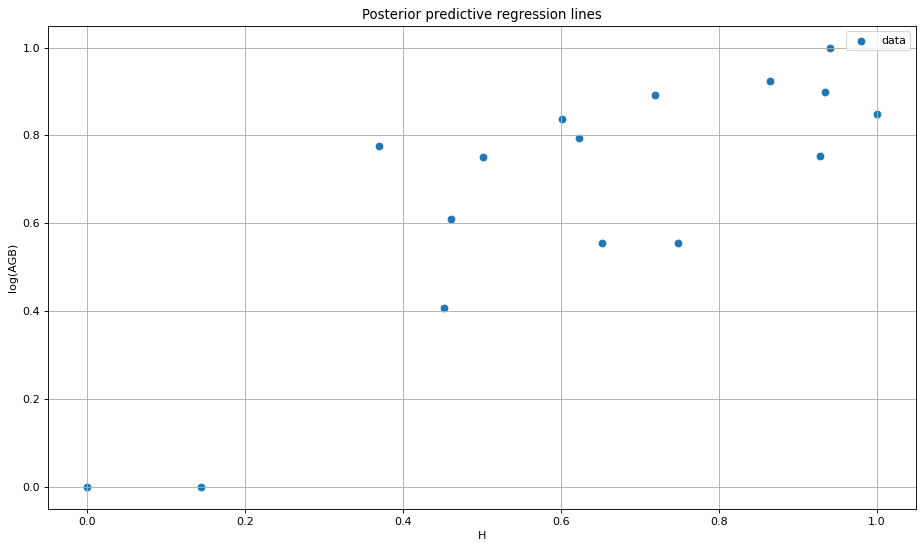

In [108]:
plt.figure(figsize=(14, 8), dpi=80)


plt.scatter(x_, y_, label="data")
plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("H")
plt.grid(True)
plt.ylabel("log(AGB)")

In [109]:
dataSAOCOM['H_std']

0     0.071837
1     0.061712
2     0.047725
3     0.080094
4     0.090038
5     0.060378
6     0.074611
7     0.076017
8     0.059086
9     0.055720
10    0.095124
11    0.047679
12    0.045986
13    0.062019
14    0.060740
15    0.091096
Name: H_std, dtype: float64

In [116]:
with pm.Model() as model:  # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    # sigma = pm.HalfCauchy("sigma", beta=10) #testval=1.0
    # sigmaObs = pm.HalfNormal('sd', sigma=10)
    # sigmaObs = 0.07
    sigmaObs = dataSAOCOM['H_std']
    intercept = pm.Normal("Intercept", mu=0, sigma=10)
    x_coeff = pm.Normal("x", mu=0, sigma=10)

    # Define likelihood
    likelihood = pm.Normal("y", mu=intercept + x_coeff * x_, sigma=sigmaObs, observed=y_)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    trace = pm.sample(5000, tune=1000) #return_inferencedata=True

    ppc = pm.sample_posterior_predictive(trace, var_names=["y"], samples=500)

/tmp/ipykernel_7585/608445063.py:15: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(5000, tune=1000) #return_inferencedata=True
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x, Intercept]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 8 seconds.
The acceptance probability does not match the target. It is 0.6220479453325043, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8819194289853965, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
/home/fran/miniconda3/envs/bayes/lib/python3.9/site-packages/pymc3/sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


/home/fran/miniconda3/envs/bayes/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'x'}>]], dtype=object)

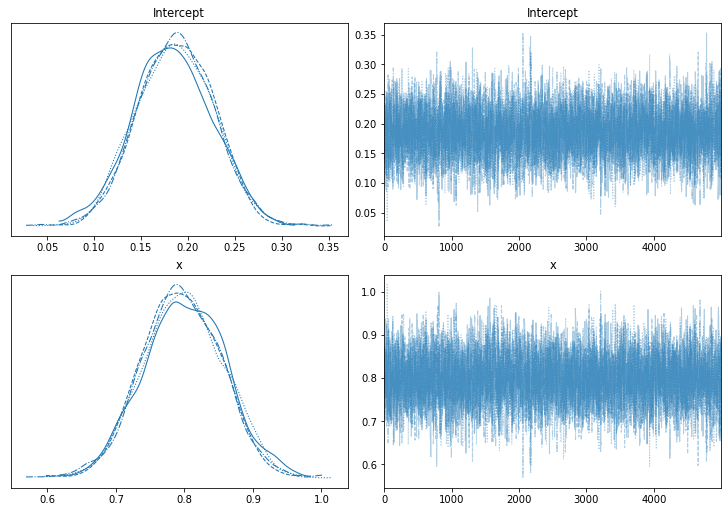

In [117]:
# import arviz as az

ppc_y = ppc['y']

az.plot_trace(trace, figsize=(10, 7))

/home/fran/miniconda3/envs/bayes/lib/python3.9/site-packages/pymc3/plots/posteriorplot.py:59: DeprecationWarning: The `plot_posterior_predictive_glm` function will migrate to Arviz in a future release. 
Keep up to date with `ArviZ <https://arviz-devs.github.io/arviz/>`_ for future updates.
  warnings.warn(


Text(0, 0.5, 'log(AGB)')

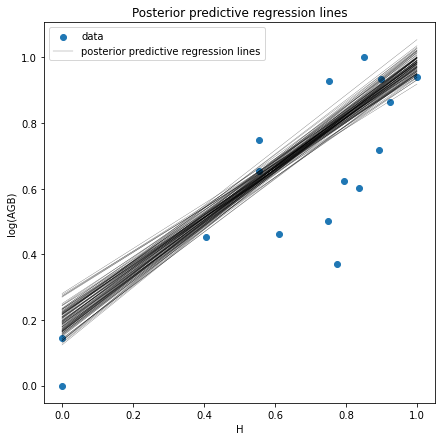

In [118]:
plt.figure(figsize=(7, 7))
# plt.scatter(x_, y, label="data")
plt.scatter(y_, x_, label="data")
pm.plot_posterior_predictive_glm(trace, samples=100, label="posterior predictive regression lines")
# plt.plot(x, true_regression_line, label="true regression line", lw=3.0, c="y")

# for i in range(30):
#     plt.plot(x_, ppc_y[i,:], ':k', alpha = 0.3) #,  label='sample'

plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("H")
plt.ylabel("log(AGB)")

Text(0, 0.5, 'H')

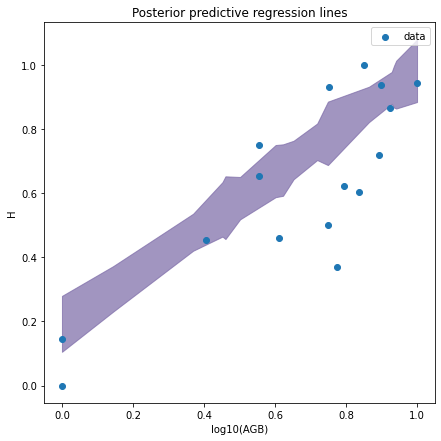

In [119]:
plt.figure(figsize=(7, 7))
qs = mquantiles(ppc_y, [0.15, 0.85], axis=0)
plt.fill_between(x_, *qs, alpha=0.7, color="#7A68A6")


plt.scatter(y_, x_, label="data")

# for i in range(1):
#     plt.plot(x_, ppc_y[i,:], ':k', alpha = 0.3) #,  label='sample'

plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("log10(AGB)")
plt.ylabel("H")

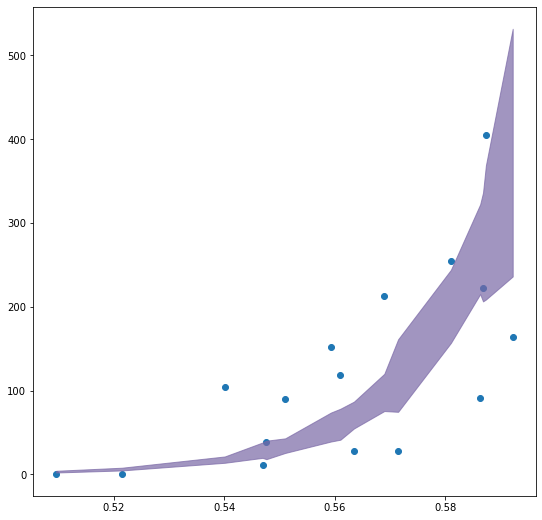

In [121]:
plt.figure(figsize=(9, 9))

y_vuelta = 10**vuelta(y_, y_min, y_max)
x_vuelta = vuelta(x_, x_min, x_max)
plt.scatter(x_vuelta, y_vuelta)

qs = mquantiles(10**vuelta(ppc_y, y_min, y_max), [0.25, 0.75], axis=0)
plt.fill_between(x_vuelta, *qs, alpha=0.7, color="#7A68A6")

In [115]:
# dataSAOCOM.sort_values('AGB')[['AGB','C22_corr','C22_std','H']]

,AGB,C22_corr,C22_std,H
14,0.00,0.018574,0.006081,0.509617
15,0.00,0.025993,0.014265,0.521500
13,10.50,0.043720,0.011930,0.546948
4,27.00,0.057201,0.018817,0.571479
5,27.00,0.052141,0.015727,0.563491
6,38.00,0.048302,0.020740,0.547642
3,89.50,0.066923,0.030137,0.551049
7,90.50,0.055419,0.026652,0.586323
2,103.75,0.055471,0.018810,0.540118
11,117.00,0.056472,0.013747,0.561035


In [ ]:
# Inferencia C22 y H

z_raw = np.log10(dataSAOCOM.sort_values('C22_corr_dB')['AGB']+1)
y_raw = dataSAOCOM.sort_values('C22_corr_dB')['H']
x_raw = dataSAOCOM.sort_values('C22_corr_dB')['C22_corr_dB']

x_min = x_raw.min()
x_max = x_raw.max()
y_min = y_raw.min()
y_max = y_raw.max()
z_min = z_raw.min()
z_max = z_raw.max()

x_ = ida(x_raw, x_min, x_max)
y_ = ida(y_raw, y_min, y_max)
z_ = ida(z_raw, z_min, z_max)

In [ ]:
plt.figure(figsize=(14, 8), dpi=80)


plt.scatter(x_, y_, s=500*z_, label="data")
plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("C22")
plt.grid(True)
plt.ylabel("H")
# plt.zlabel("log(AGB)")

In [ ]:
with pm.Model() as model:  # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    # sigma = pm.HalfCauchy("sigma", beta=10) #testval=1.0
    # sigmaObs = pm.HalfNormal('sd', sigma=10)
    sigmaObs = 0.5
    # sigmaObs = sigmaPorPunto
    intercept = pm.Normal("Intercept", mu=0, sigma=10)
    x_coeff = pm.Normal("x_coeff", mu=0, sigma=10)
    y_coeff = pm.Normal("y_coeff", mu=0, sigma=10)

    # Define likelihood
    likelihood = pm.Normal("z", mu=intercept + x_coeff * x_ + y_coeff * y_, sigma=sigmaObs, observed=z_)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    trace = pm.sample(5000, tune=1000) #return_inferencedata=True

    ppc = pm.sample_posterior_predictive(trace, var_names=["z"], samples=1000)

In [ ]:
ppc_y = ppc['z']

az.plot_trace(trace, figsize=(10, 7))

In [ ]:
plt.figure(figsize=(12, 10))
qs = mquantiles(ppc_y, [0.15, 0.85], axis=0)
plt.fill_between(x_, *qs, alpha=0.5, color="#7A68A6")


plt.scatter(z_, x_, alpha=0.7,  label="data")

plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("C22")
plt.ylabel("log10(AGB")

In [ ]:
plt.figure(figsize=(12, 10))
qs = mquantiles(ppc_y, [0.15, 0.85], axis=0)

aux = np.argsort(y_)
qs_sorted = qs[:,aux]
y_sorted = y_[aux]

plt.fill_between(y_sorted, *qs_sorted, alpha=0.5, color="#7A68A6")


plt.scatter(z_, y_, alpha=0.7,  label="data")

plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("H")
plt.ylabel("log10(AGB")

In [ ]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(projection='3d')
# qs = mquantiles(ppc_y, [0.15, 0.85], axis=0)
# plt.fill_between(x_, *qs, alpha=0.5, color="#7A68A6")


ax.scatter(y_, x_, z_, label="data")

# for i in range(1):
#     plt.plot(x_, ppc_y[i,:], ':k', alpha = 0.3) #,  label='sample'

plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
ax.set_xlabel("C22")
ax.set_ylabel("H")
ax.set_zlabel("log10(AGB)")

In [ ]:
qs.shape

In [ ]:
qs

In [ ]:
# Estimacion error en Polarimetria  

In [ ]:
# ro_HHVV = np.abs(C[0,2]/(np.sqrt(C[0,0]*C[2,2])))
# ro_HHHV = np.abs(C[0,1]/(np.sqrt(2*C[0,0]*C[1,1])))
# ro_VVHV = np.abs(C[2,1]/(np.sqrt(2*C[1,1]*C[2,2])))



In [ ]:
# np.arctan2(y, x)

# phi_HHVV = np.arctan2(np.imag(C[0,2]), np.real(C[0,2]))
# phi_HHHV = np.arctan2(np.imag(C[0,1]), np.real(C[0,1]))
# phi_VVHV = np.arctan2(np.imag(C[2,1]), np.real(C[2,1]))

In [ ]:
# function [a,d] = cwishrnd(sigma,df,d)

# # Para nlooks (<50) chicos anda. Por las dudas, probar usando el xi

# # Modificacion hecha basado en 
# # https://math.stackexchange.com/questions/2476666/complex-wishart-distribution-in-matlab

# # If you take a look at the wishrnd.m function's code, you'll see a couple of things.
# # The first is that if the degrees of freedom are less than somewhere around 81 or so,
# # then the method that you described is exactly the method that is used to generate the Wishart.
# # The only thing that needs to change in the code is that instead of
# # 
# # x = (randn(df,size(d,1))*d;
# # 
# # you should be using something like
# # 
# # x = (randn(df,size(d,1)) + 1i*randn(df,size(d,1)))/sqrt(2) * d;
# # 
# # to generate the complex normal draws.
# # 
# # The second method is based on the Bartlett decomposition, and the code specifies a reference of Smith and Hocking (which I frankly never found). An x similar to that used in the real-valued code can be built, but because of the complex nature of the covariance structure, the diagonal elements are not χ2
# # -variables, but rather Generalized Gamma distributed (see for example Nagar & Gupta, 2011).
# # If you'd like to use this method (i.e. you need degrees of freedom much greater than 80), then in the code, substitute in for a a correctly sized diagonal matrix whose elements are drawn from the generalized gamma distribution as described in the paper, and away you go!
# # Nagar, Daya K.; Gupta, Arjun K., Expectations of functions of complex Wishart matrix, Acta Appl. Math. 113, No. 3, 265-288 (2011). ZBL1207.62114.

# #WISHRND Generate Wishart random matrix
# #   W=WISHRND(SIGMA,DF) generates a random matrix W having the Wishart
# #   distribution with covariance matrix SIGMA and with DF degrees of
# #   freedom.
# #
# #   W=WISHRND(SIGMA,DF,D) expects D to be the Cholesky factor of
# #   SIGMA.  If you call WISHRND multiple times using the same value
# #   of SIGMA, it's more efficient to supply D instead of computing
# #   it each time.
# #
# #   [W,D]=WISHRND(SIGMA,DF) returns D so it can be used again in
# #   future calls to WISHRND.
# #
# #   See also IWISHRND.

# #   References:
# #   Krzanowski, W.J. (1990), Principles of Multivariate Analysis, Oxford.
# #   Smith, W.B., and R.R. Hocking (1972), "Wishart variate generator,"
# #      Applied Statistics, v. 21, p. 341.  (Algorithm AS 53)

# #   Copyright 1993-2011 The MathWorks, Inc. 


# # Error checking
# narginchk(2,3);

# [n,m] = size(sigma);
# if n~=m
#    error(message('stats:wishrnd:BadCovariance'));
# end

# # Factor sigma unless that has already been done
# if (nargin<3)
#    [d,p] = cholcov(sigma,1);
#    if p~=0
#       error(message('stats:wishrnd:BadCovariance'))
#    end
# elseif ~isempty(sigma)
#    if size(d,2) ~= n || size(d,1) > n
#       error(message('stats:wishrnd:BadCovFactor'))
#    end
# else
#    n = size(d,2);
# end

# if (~isscalar(df)) || (df<=0)
#    error(message('stats:wishrnd:BadDf'))
# elseif (df<=n-1) && (df~=round(df))
#    error(message('stats:wishrnd:BadDf'));
# end

# # For small degrees of freedom, generate the matrix using the definition
# # of the Wishart distribution; see Krzanowski for example
# if (df <= 81+n) && (df==round(df))
#    % x = randn(df,size(d,1)) * d;
#    x = (randn(df,size(d,1)) + 1i*randn(df,size(d,1)))/sqrt(2) * d; % MODIFICACiON

# # Otherwise use the Smith & Hocking procedure
# # W.B. Smith and R.R. Hocking, “Algorithm AS 53: Wishart Variate Generator”, Applied Statistics, vol. 21, pp. 341-345, 1972.
# else
#    # Load diagonal elements with square root of chi-square variates
#    a = diag(sqrt(chi2rnd(df-(0:n-1))));

#    # Load upper triangle with independent normal (0, 1) variates
#    a(itriu(n)) = randn(n*(n-1)/2,1);

#    # Desired matrix is D'(A'A)D
#    x = a(:,1:size(d,1))*d;
# end

# a = x' * x;


# # --------- get indices of upper triangle of p-by-p matrix
# function d=itriu(p)

# d=ones(p*(p-1)/2,1);
# d(1+cumsum(0:p-2))=p+1:-1:3;
# d = cumsum(d);

In [ ]:
# function [a,d] = cwishrnd(sigma,df,d)

# def cwishrnd(sigma,df,d):
def cwishrnd(sigma,df):
   '''
   generados MC Wishart
   '''
   n,m = sigma.shape
   if n is not m: 
      print('stats:wishrnd:BadCovariance')

   # Factor sigma unless that has already been done
   # if (nargin<3):
   #    [d,p] = cholcov(sigma,1);
   #    if p~=0
   #       error(message('stats:wishrnd:BadCovariance'))
   #    end
   # elseif ~isempty(sigma)
   #    if size(d,2) ~= n || size(d,1) > n
   #       error(message('stats:wishrnd:BadCovFactor'))
   #    end
   # else
   #    n = size(d,2);
   # end

   # if (~isscalar(df)) || (df<=0)
   #    error(message('stats:wishrnd:BadDf'))
   # elseif (df<=n-1) && (df~=round(df))
   #    error(message('stats:wishrnd:BadDf'));
   # end

   # For small degrees of freedom, generate the matrix using the definition
   # of the Wishart distribution; see Krzanowski for example

   d = np.linalg.cholesky(sigma) # suposicion de aca https://www.mathworks.com/help/stats/cholcov.html

   if (df <= 81+n):
      # x = randn(df,size(d,1)) * d;
      
      # x = (np.random.randn(df,d.shape[0]) + 1j*np.random.randn(df,d.shape[0]))/np.sqrt(2) * d # MODIFICACiON
      x = np.matmul((np.random.randn(df,d.shape[0]) + 1j*np.random.randn(df,d.shape[0]))/np.sqrt(2), d.T)

   
   return np.matmul(np.conj(x.T), x)
   # Otherwise use the Smith & Hocking procedure
   # W.B. Smith and R.R. Hocking, “Algorithm AS 53: Wishart Variate Generator”, Applied Statistics, vol. 21, pp. 341-345, 1972.
   # else
   #    % Load diagonal elements with square root of chi-square variates
   #    a = diag(sqrt(chi2rnd(df-(0:n-1))));

   #    # Load upper triangle with independent normal (0, 1) variates
   #    a(itriu(n)) = randn(n*(n-1)/2,1);

   #    # Desired matrix is D'(A'A)D
   #    x = a(:,1:size(d,1))*d;
   # end

   # a = x' * x;


   # # --------- get indices of upper triangle of p-by-p matrix
   # function d=itriu(p)

   # d=ones(p*(p-1)/2,1);
   # d(1+cumsum(0:p-2))=p+1:-1:3;
   # d = cumsum(d);

In [ ]:
# sigma = C[:,:,0]
# df = 15
# d = np.real(np.linalg.cholesky(sigma))
# x = np.matmul((np.random.randn(df,d.shape[0]) + 1j*np.random.randn(df,d.shape[0]))/np.sqrt(2), d)


In [ ]:
print(sigma)

In [ ]:
# # Monte Carlo para muestrear matriz de coherencia T

# # Uso matrix C de 2x2 para demostrar la corrida
# # C11 seria HH y C22 seria VV.

# # Modelo para la Matriz de covarianza C=E[]
# nl = 15 # numero de looks
# C = [0.010,0.012] #  valore medio para E[HHHH*] y E[VVVV*]
# rc = 0.7
# psi = 0*np.pi/180 #  coherencia y fase (define E[HHVV*])

# # Matriz de coherencia 2x2
# C11 = C(1)
# C22 = C(2)
# C12 = np.sqrt(C11*C22)*rc*np.exp(1j*psi)
# CC =  [[C11, C12], [np.conj(C12), C22]]

# # ***USO Wishart modificada para complejos, nl<50!***
# _,L = cwishrnd(CC,nl)
# Ws = []
# for k in range(10000):
#     W =  cwishrnd(CC,nl,L)/nl
#     Ws.append(W)

# # Asignacion
# HHHH = Ws[1,:] ; # HHHH*
# VVHH = Ws[2,:] ; # VVHH*
# HHVV = Ws[3,:] ; # HHVV*
# VVVV = Ws[4,:] ; # VVVV*

# # Elemento T11 = |HH + VV|^2 = HHHH* + HHVV* + VVHH* + VVVV* 
# T11 = HHHH + HHVV + VVHH + VVVV

# # Elemento T12 = (HH + VV)(HH - VV)* = HHHH* - HHVV* + VVHH* - VVVV*
# T12 = HHHH - HHVV + VVHH - VVVV

# # Elemento T22 = |HH - VV|^2 = HHHH* - HHVV* - VVHH* + VVVV*
# T22 = HHHH - HHVV - VVHH + VVVV

# # Histogramas
# # figure
# # subplot(1,3,1), histogram(T11,20)
# # subplot(1,3,2), histogram(real(T12),20)
# # subplot(1,3,3), histogram(T22,20)

# # Asi siguiendo ... 
# # A medida que armas la matriz CC de 3x3 o 4x4 podes muestrear los otros elementos de T Tij